## **Prediksi Pembatalan Booking Hotel: Pencegahan dan Strategi Penanggulangannya**

### **Konteks Proyek**
Pembatalan pemesanan yang tidak terprediksi menjadi masalah bagi hotel, karena dapat menyebabkan inefisiensi sumberdaya, beralihlnya ke calon tamu ke kompetitor, ataupun operasional yang tidak teratur. Proyek ini bertujuan untuk memanfaatkan model prediksi pembatalan agar hotel dapat lebih siap menghadapinya, sebagai dasar pertimbangan dalam penyesuaian kebijakan harga dan layanan.

### **Dampak Permasalahan terhadap Divisi**

Sebuah perusahaan hotel mengalami masalah akibat tingginya jumlah booking yang tidak pasti. Masalah ini dialami beberapa divisi, antara lain:

Manajemen
- **Perumusan dan evaluasi strategi**  
    Calon tamu memiliki kecenderungan yang berbeda beda, sehingga tim manajemen harus membuat beberapa strategi.

Front Office  
- **Perencanaan staffing dan alokasi kamar terkendala akibat dari ketidakpastian booking**  
    Hal ini mengakibatkan inefisiensi sumber daya

- **Slot kamar terisi dengan booking yang tak pasti**  
    Akibatnya, calon tamu yang benar-benar ingin menginap beralih ke kompetitor.      

Marketing  
- **Tingkat konversi yang perlu dijaga dan ditingkatkan**  
    Tingkat konversi hotel sudah cukup tinggi, namun ada peluang untuk meningkatkannya

### **Tujuan Pengembangan Machine Learning**

- **Mengidentifikasi potensi pembatalan booking sebagai dasar penilaian risiko**  
    Hasil dari identifikasi risiko dapat digunakan sebagai dasar pengambilan langkah preventif.

- **Mengklasifikasi kemungkinan pembatalan booking berdasarkan tinggi rendahnya kemungkinan pembatalan**  
    Tingkat pembatalan yang berbeda-beda bisa menjadi ukuran dalam mengambil tindakan preventif.

- **Menyediakan dasar yang bisa membantu tiap divisi dalam mengambil keputusan**  
    Segmentasi risiko pembatalan tamu mendukung manajemen dalam membuat dan mengevaluasi strategi promosi & operasional.
    Bekerja sama dengan divisi lain front office bisa membuat perencanaan staf dan alokasi kamar.
    Memanfaatkan informasi prediksi pembatalan sebagai dasar tambahan sehingga bagian marketing dapat menjaga atau meningkatkan konversi reservasi menjadi kedatangan aktual


### **Dataset yang digunakan**
Dataset yang digunakan adalah dataset **hotel booking** demand yang sudah disesuaikan

### **Langkah Pemecahan Masalah**

Menganalisis data historis untuk mengenali ciri-ciri pemesanan yang cenderung dibatalkan, lalu membangun model prediktif guna mengidentifikasi tamu berisiko. Hasilnya dapat digunakan sebagai acuan dalam pengambilan keputusan strategis.

#### **Metrik Evaluasi: Recall**

**Tujuan:**   
Menangkap sebanyak mungkin calon tamu yang berpotensi membatalkan pesanan (mengurangi jumlah false negative).

- **Keuntungan (Pros):**
    Memungkinkan tim untuk lebih proaktif dalam mengantisipasi pembatalan, misalnya dengan memberikan penawaran khusus atau follow-up kepada tamu yang berisiko tinggi membatalkan.

- **Kerugian (Cons):**
    Risiko memberikan promosi atau penawaran ke tamu yang sebenarnya tidak berniat membatalkan (false positive), sehingga strategi bisa menjadi tidak efisien atau bahkan dianggap mengganggu oleh tamu yang tidak bermasalah.


![My first board40..jpg](<attachment:My first board40..jpg>)
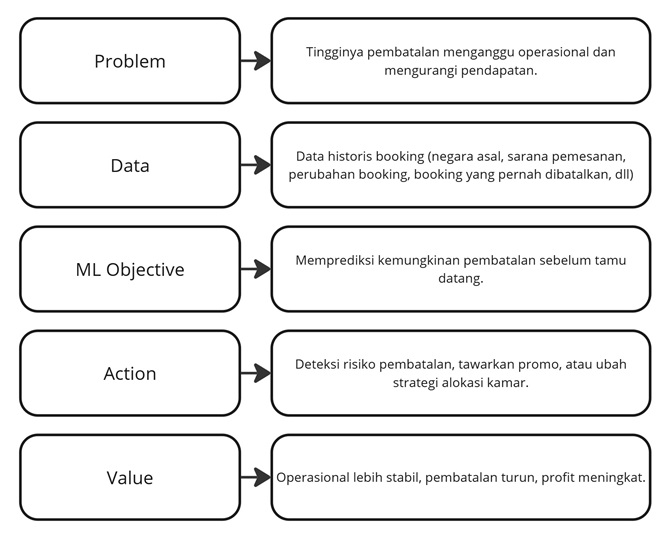

### Penggunaan Library dan Import Data

In [1]:

# Basic
import numpy as np
import pandas as pd
import seaborn as sns

# Viz
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce


# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold

# Metrics (Evaluasi Model)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error, r2_score
)

# Model selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Warning
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv(r'C:\Users\Hewlett Packard\Desktop\SAYA\Capstone 3\Hotel Booking Demand\data_hotel_booking_demand.csv')

### Deskripsi Dataset Hotel Booking Demand

| Kolom                        | Deskripsi Singkat                                                                                          |
| ---------------------------- | ---------------------------------------------------------------------------------------------------------- |
| `country`                    | Negara asal pelanggan. Direpresentasikan dengan tiga huruf (contoh: `PRT` = Portugal)                                                                                   |
| `market_segment`             | Segmen pasar atau metode pemesanan. Baik secara langsung, agen perjalanan(online/offline) grup, ataupun pemesanan non komersil                                                                           |
| `previous_cancellations`     | Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini (contoh: 2 = pelanggan sebelumnya telah melakukan pembatalan pemesanan dua kali).                     |
| `booking_changes`            | Jumlah perubahan atau revisi yang dilakukan terhadap detail pemesanan sejak awal hingga check-in atau pembatalan (contoh: 1 = pelanggan telah melakukan satu kali perubahan terhadap pemesanan tersebut). |
| `deposit_type`               | Jenis deposit pada saat pemesanan. `No Deposit` berarti tidak ada pembayaran di awal, `Refundable` dapat dikembalikan jika dibatalkan, dan `Non Refund` tidak dapat dikembalikan. |                         
| `days_in_waiting_list`       | Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi. Nilai 0 artinya pemesanan langsung diterima tanpa perlu menunggu.                                     |
| `customer_type`              |Jenis pelanggan berdasarkan tipe pemesanan. `Group` adalah tamu dari suatu instansi, `Transient` adalah tamu individu, `Transient-Party` adalah individu yang datang berkelompok, dan `Contract` adalah tamu dari institusi dengan perjanjian khusus.                                                               |
| `reserved_room_type`         | Kode jenis kamar yang dipesan. Menggunakan kode huruf tertentu untuk menjaga kerahasiaan.                                 |
| `required_car_parking_space` | Jumlah tempat parkir mobil yang diminta oleh pelanggan. Nilai 1 untuk satu tempat parkir mobil                                                   |
| `total_of_special_request`   | Jumlah permintaan khusus dari pelanggan (misalnya tempat tidur twin atau lantai atas). Nilai 1 untuk satu permintaan khusus                     |
| `is_canceled`                | Menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).                                                |


### Target: `is_canceled` | Features: Seluruh kolom lainnya


Target prediksinya adalah `is_canceled` yang mewakili pembatalan booking 1 berarti batal, 0 berarti tidak batal.  
Pertama-tama kita akan mencoba train dengan seluruh kolom selain `is_canceled` sebagai fitur, nantinya fitur akan diatur ulang bila diperlukan.


## **Exploratory Data Analysis (Eksplorasi Data)**


Sebelum membangun model machine learning, langkah pertama yang penting adalah memahami karakteristik dataset, terutama hubungan antara setiap fitur dengan target `is_canceled`.

### Gambaran Besar Dataset

In [3]:
# Menampilkan 5 baris pertama dari DataFrame
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [4]:
# Menampilkan informasi umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [5]:
# Menampilkan banyak kolom dan baris dalam DataFrame
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 83573 baris dan 11 kolom.


#### Memeriksa Missing Value

In [6]:
# Menampilkan jumlah missing value pada dataset
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

Terlihat ada missing value pada kolom `country`. Sebenarnya banyak *missing value* pada dataset tidak banyak, baris - baris ini bisa kita hapus, namun karena kita ingin menangkap pola yang beragam maka kita akan mengisinya dengan konstanta "Unknown"

#### Dataset Summary 

Categorical

In [7]:
df.describe(include="object")

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


"Kolom `country` memiliki 162 nilai unik, namun didominasi oleh negara PRT yang mencakup lebih dari sepertiga data, yaitu sebanyak 34.097 entri. Ketimpangan ini menunjukkan bahwa distribusi data tidak merata, sehingga diperlukan penyesuaian pada kolom ini untuk mengurangi potensi noise yang dapat mengganggu proses pelatihan model."

Numerical

In [8]:
df.describe(include="int")

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


Terlihat adanya outlier pada seluruh kolom numerik kecuali `is_canceled`. Jika kita perhatikan nilai minimum dan quartile kolom-kolom ini bernilai 0 (kecuali q3 kolom `total_of_special_requests`) sedangkan nilai maksimumnya jauh dari 0. Outlier-outlier ini tidak akan dihapus karena diharapkan model machine learning dapat mempelajari perilaku tamu melalui data tersebut. Namun, akan dilakukan penyesuaian pada kolom-kolom terkait untuk mengurangi dampak ekstrem dari nilai-nilai tersebut.

Lebih jelasnya mari kita lihat value tiap kolom.

#### Cek Value Tiap Kolom

In [9]:
for i in df.columns:
    display(df[i].value_counts())
    

country
PRT    34097
GBR     8495
FRA     7307
ESP     5996
DEU     5116
       ...  
DMA        1
KIR        1
MYT        1
KNA        1
AIA        1
Name: count, Length: 162, dtype: int64

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64

previous_cancellations
0     79060
1      4207
2        86
3        46
24       33
11       28
6        19
4        19
26       18
25       17
19       12
14       10
13       10
5         7
21        1
Name: count, dtype: int64

booking_changes
0     70873
1      8963
2      2652
3       639
4       260
5        90
6        39
7        23
8        10
10        5
9         4
13        4
17        2
12        2
14        2
16        2
21        1
20        1
15        1
Name: count, dtype: int64

deposit_type
No Deposit    73352
Non Refund    10111
Refundable      110
Name: count, dtype: int64

days_in_waiting_list
0      80988
39       166
58       104
44        93
31        93
       ...  
74         1
121        1
36         1
64         1
185        1
Name: count, Length: 115, dtype: int64

customer_type
Transient          62732
Transient-Party    17536
Contract            2882
Group                423
Name: count, dtype: int64

reserved_room_type
A    60041
D    13526
E     4649
F     2037
G     1447
B      787
C      673
H      401
P        9
L        3
Name: count, dtype: int64

required_car_parking_spaces
0    78346
1     5202
2       22
8        2
3        1
Name: count, dtype: int64

total_of_special_requests
0    49188
1    23214
2     9120
3     1784
4      236
5       31
Name: count, dtype: int64

is_canceled
0    52795
1    30778
Name: count, dtype: int64

Tidak terlihat ada missing value yang digantikan oleh konstanta.

### **Visualisasi Penyebaran Data**

Pada segmen ini kita akan meninjau visualisasi distribusi kolom-kolom pada dataset. Pertama-tama mari kita lihat distribusi penyebaran pesanan yang dibatalkan(`is_canceled`)

#### Distribusi Target (`is_canceled`): Status Pembatalan Pemesanan

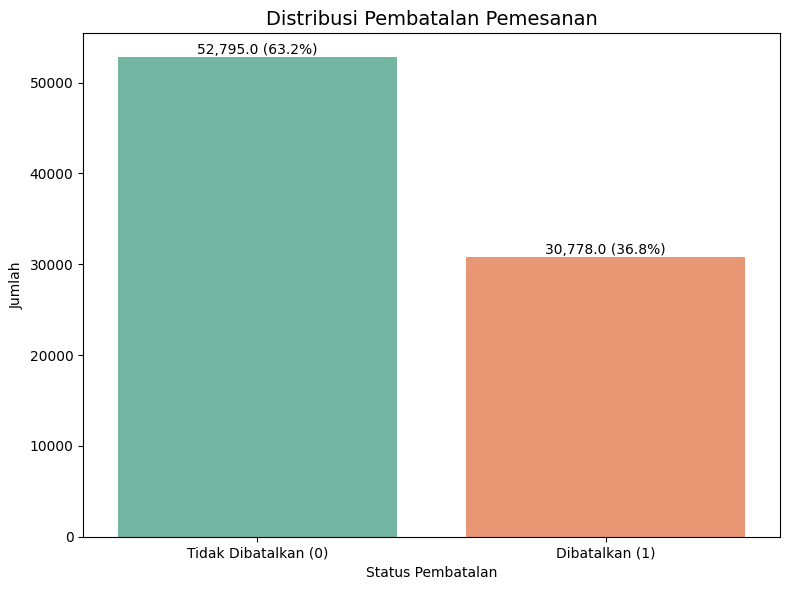

In [10]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_canceled', data=df, palette='Set2')

# Hitung persentase
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(f'{count:,} ({percentage})', 
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10)

ax.set_xticklabels(['Tidak Dibatalkan (0)', 'Dibatalkan (1)'])
plt.title('Distribusi Pembatalan Pemesanan', fontsize=14)
plt.xlabel('Status Pembatalan')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


Dari barplot di atas kita dapati mayoritas tamu tidak membatalkan pesanannya, namun proporsi pemesanan yang dibatalkan tidak bisa diabaikan mengingat persentasenya menyentuh 36.8% atau lebih dari sepertiga keseluruhan pemesanan. Selanjutnya mari tinjau distribusi penyebaran data-data kategorik

### Penyebaran Data Kolom Kategorikal

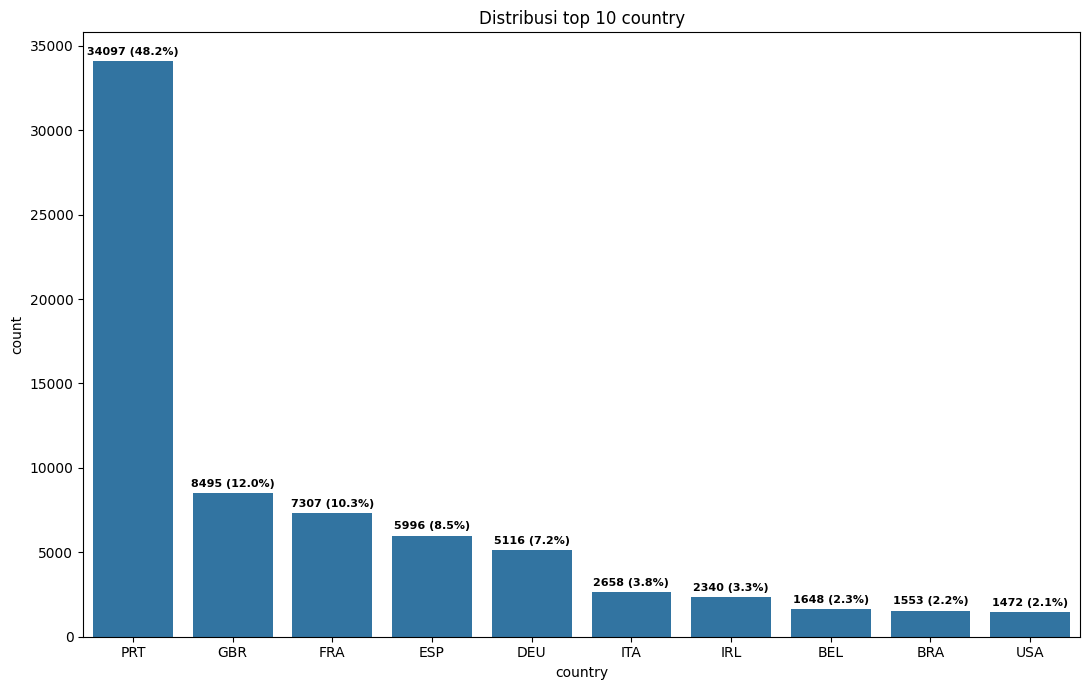

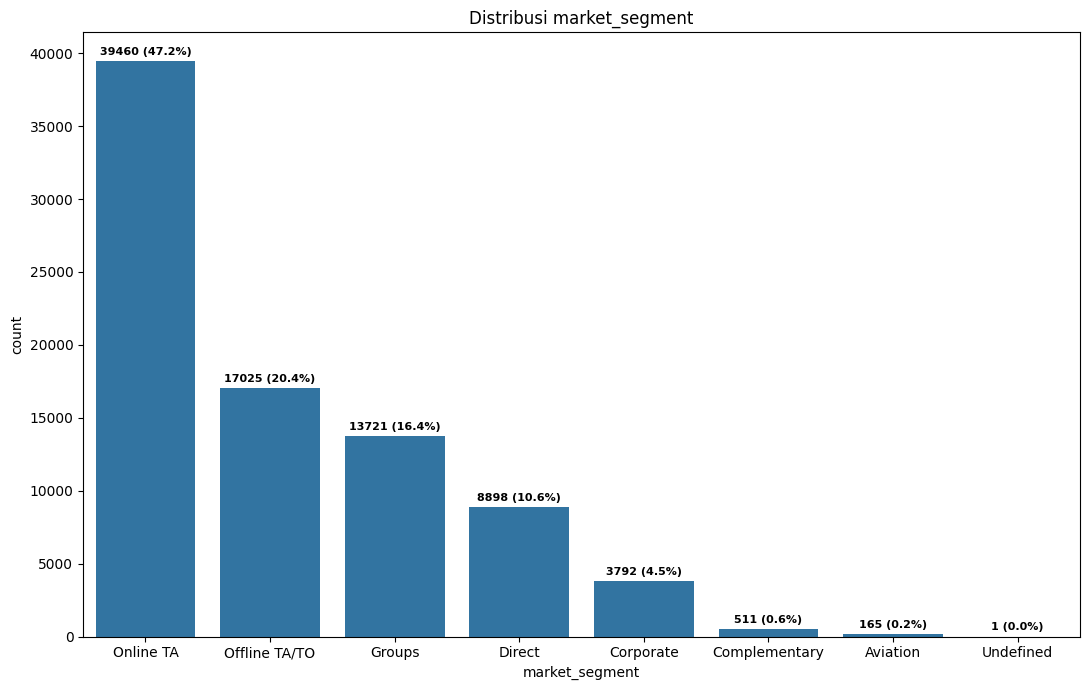

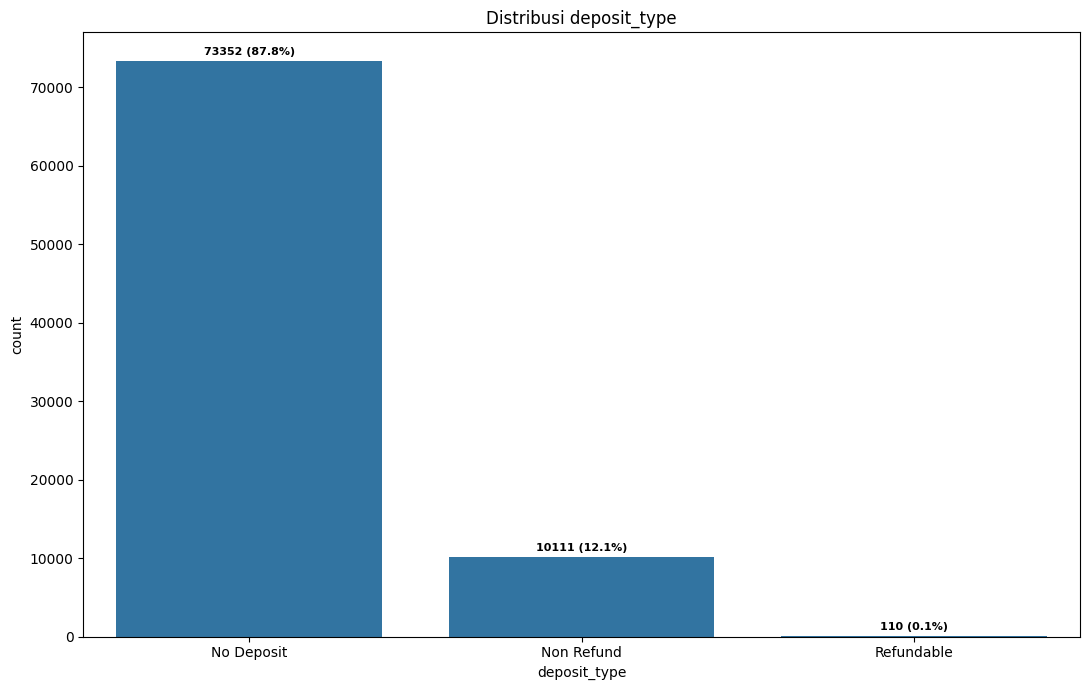

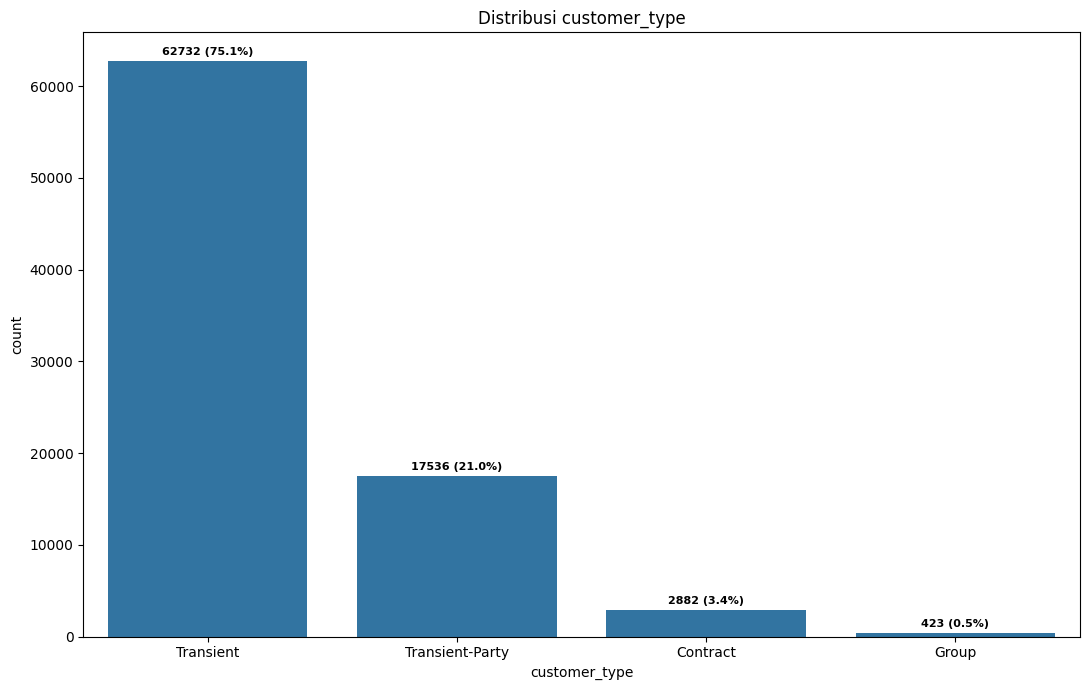

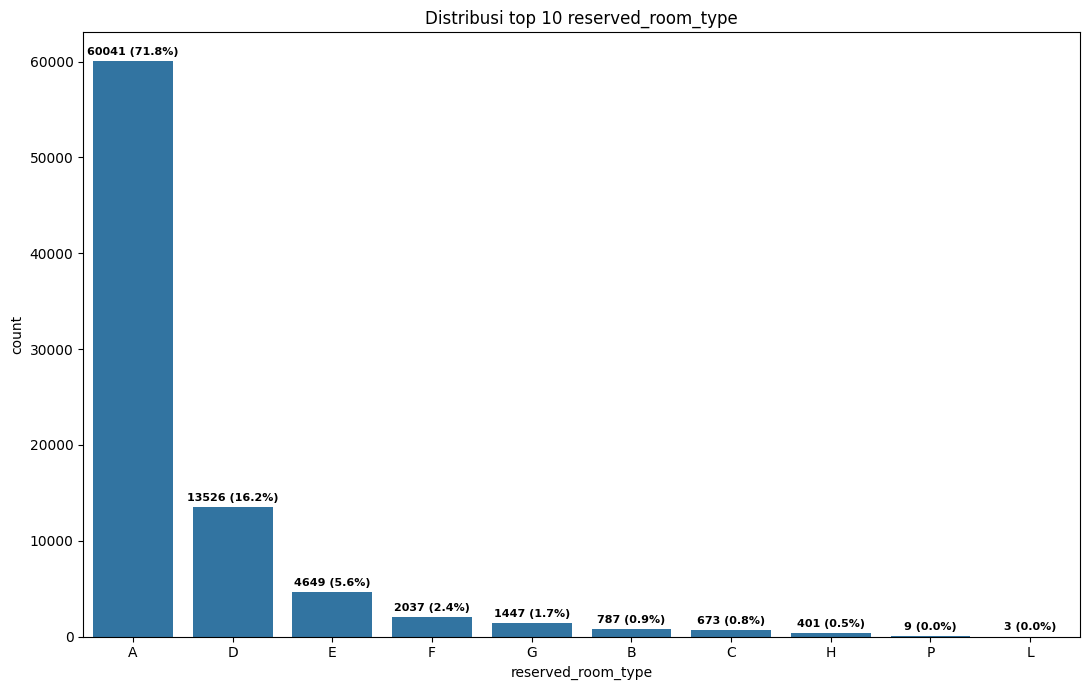

In [11]:
# Mengelompokkan kolom kategorik
cat_cols = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
for col in cat_cols:
    plt.figure(figsize=(11,7))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10]) # mengambil data maksimal 10 kategori teratas
    bars = ax.containers[0]  # ambil batangnya
    heights = [bar.get_height() for bar in bars]
    total = sum(heights)

    custom_labels = [f'{int(h)} ({h/total:.1%})' for h in heights]  # contoh: 103 (36.8%)

    ax.bar_label(
        bars,
        labels=custom_labels,
        label_type='edge',
        fontweight='bold',
        fontsize=8,
        padding=3
    )
    if len(df[col].unique()) >= 10 :
        plt.title(f'Distribusi top 10 {col}')
    else:
        plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

Dari distribusi penyebaran data di atas ada beberapa hal yang kita dapati seperti:
* Mayoritas pengunjung hotel berasal dari negara eropa dengan posisi pertama Portugal(`PRT`) yang memiliki proporsi hampir 50%, ini cukup wajar mengingat perusahaan hotel ini terletak di negara tersebut
* Pelanggan memiliki kecenderungan untuk memesan kamar melalui travel agent baik itu online maupun offline dengan persentase 47.2%(`Online TA`) dan 20.4%(`Offline TA/TO`)
* Pada umumnya pelanggan memesan kamar tanpa deposit, ini cukup wajar mengingat kebanyakan pelanggan memesan kamar melalui travel agent
* Lebih dari 90% pelanggan adalah pelanggan konvensional baik itu individu maupun kelompok dengan persentase 75.1%(`Transient`) dan 21%(`Transient-Party`)
* Ruangan-ruangan yang banyak terisi adalah tipe A(71.8%), D(16.2%), dan E(5.6%), namun yang perlu kita perhatikan adalah ruangan tipe P dan L, kedua ruangan tersebut bahkan tidak terisi sampai 0.1%

Rekomendasi:
* Kamar tipe L dan P mencatat tingkat pemesanan yang sangat rendah. Untuk mengoptimalkan pendapatan dan efisiensi operasional, disarankan agar tipe kamar ini dialihfungsikan ke tipe yang memiliki permintaan lebih tinggi. Mengabaikan hal ini dapat menyebabkan inefisiensi dan pemborosan sumber daya.

Berikutnya mari kita lihat distribusi penyebaran data numerik

### Penyebaran Data Kolom Numerikal

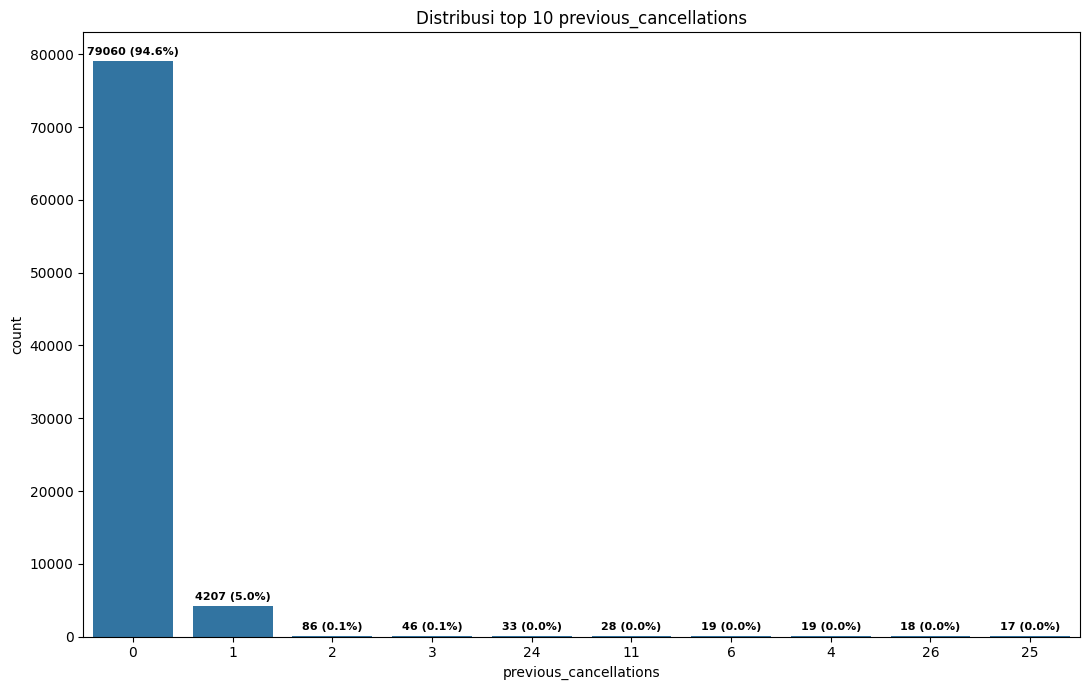

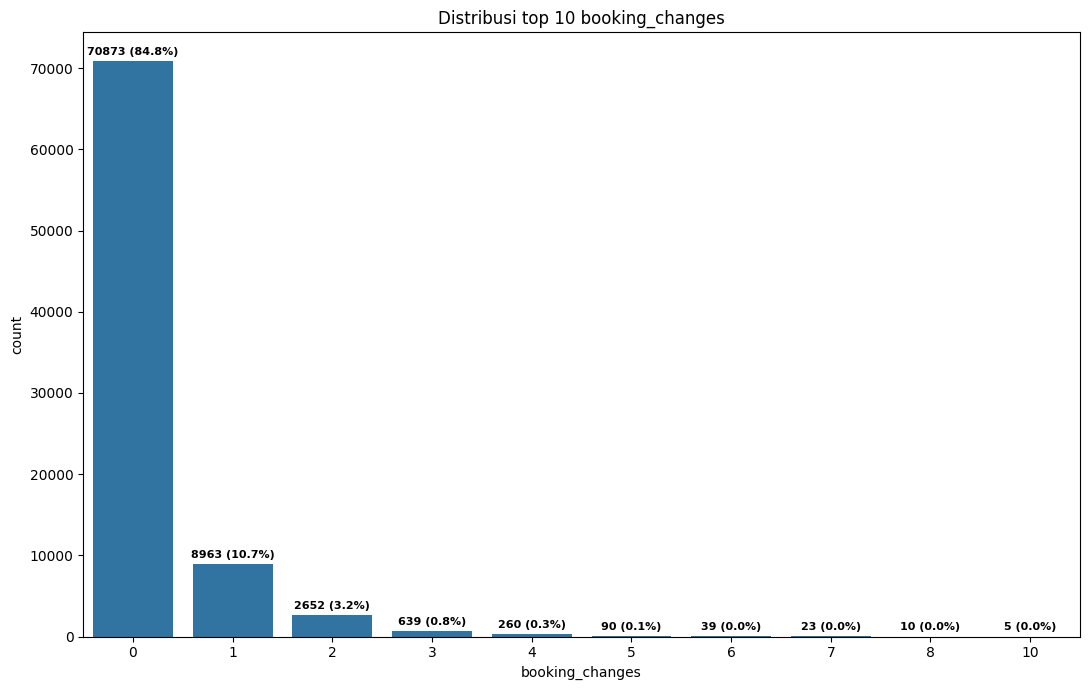

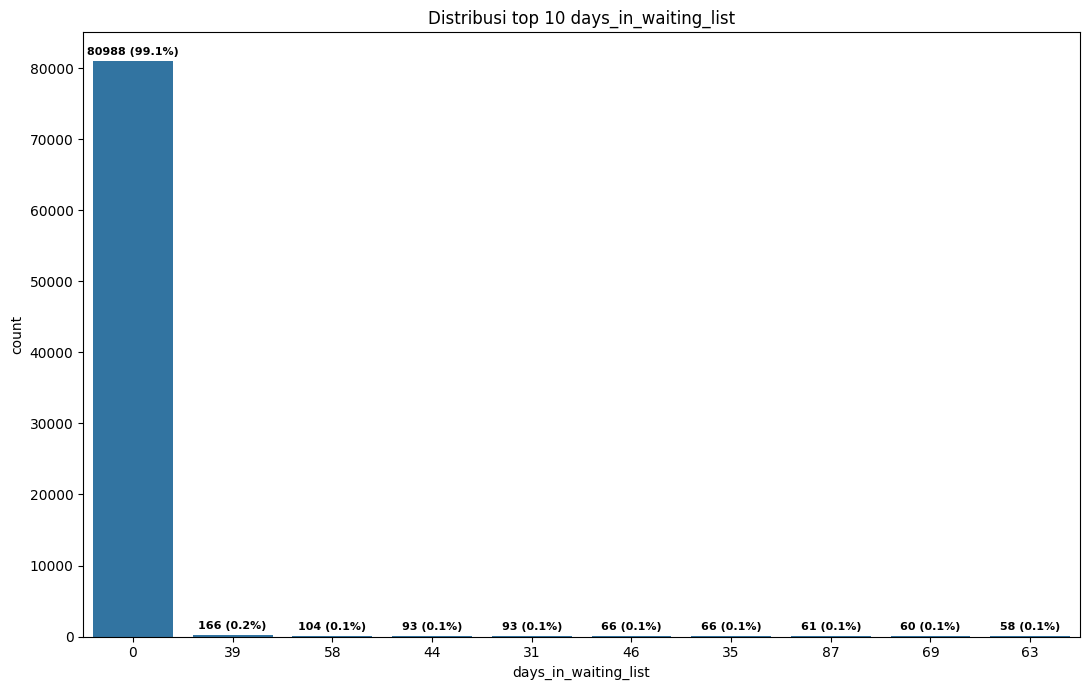

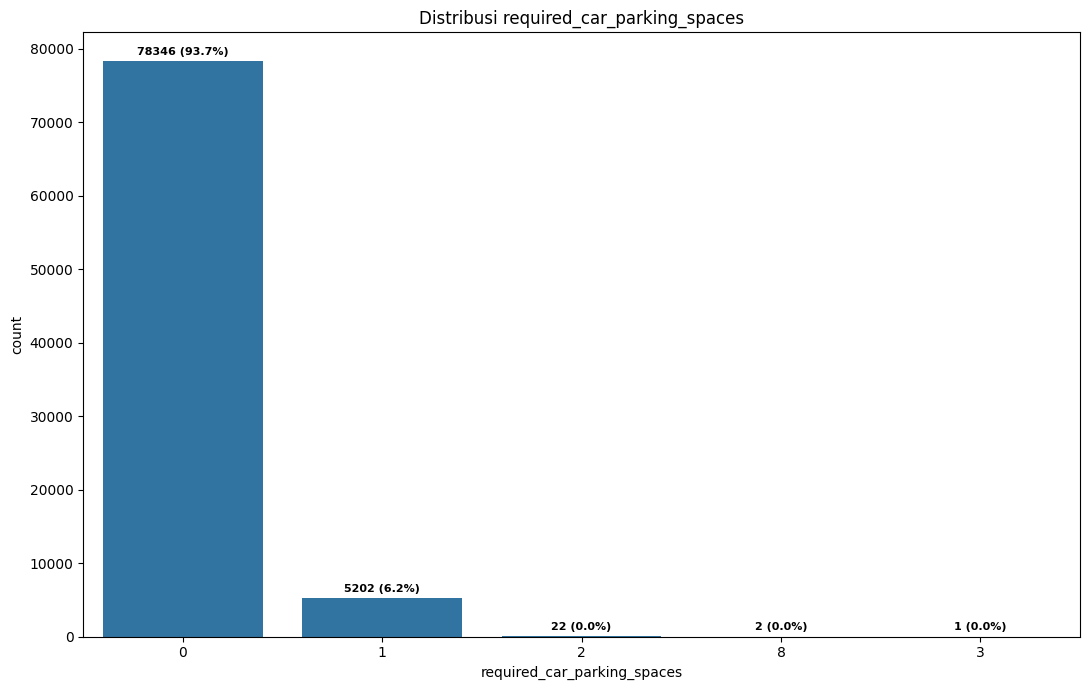

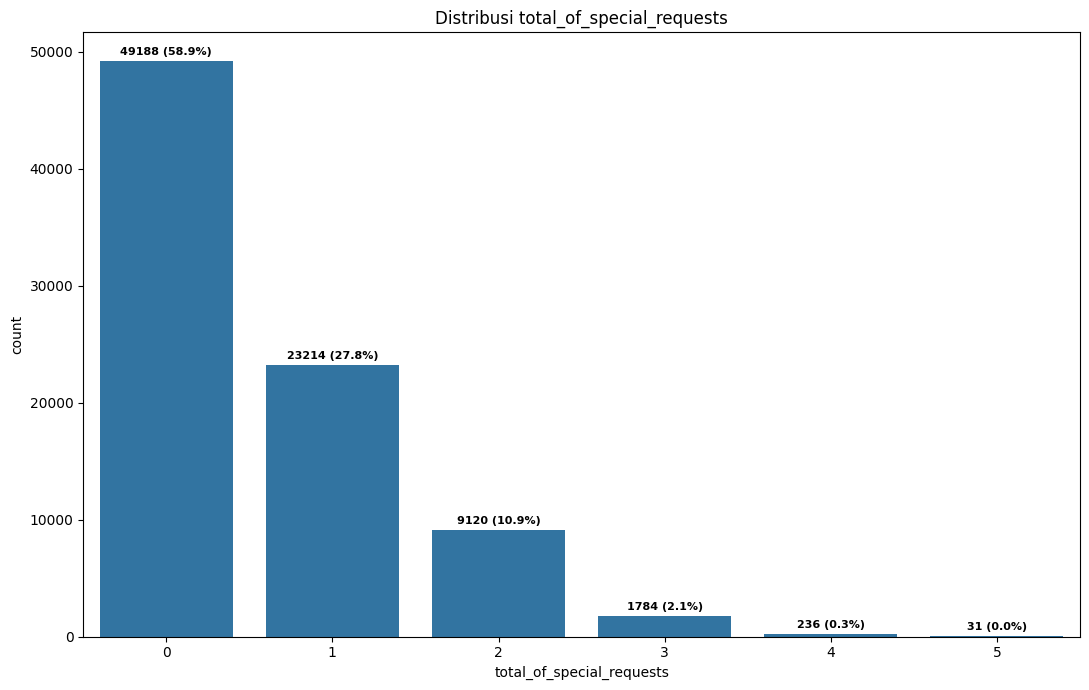

In [12]:
# Mengelompokkan kolom numerik
num_cols = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
for col in num_cols:
    plt.figure(figsize=(11,7))
    # Catatan: Kolom - kolom numerik ini merupakan diskrit, sehingga kita memilih menggunakan countplot dibanding histogram
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10]) # mengambil data maksimal 10 kategori teratas
    bars = ax.containers[0]  # ambil batangnya
    heights = [bar.get_height() for bar in bars]
    total = sum(heights)

    custom_labels = [f'{int(h)} ({h/total:.1%})' for h in heights]  # contoh: 103 (36.8%)

    ax.bar_label(
        bars,
        labels=custom_labels,
        label_type='edge',
        fontweight='bold',
        fontsize=8,
        padding=3
    )
    if len(df[col].unique()) >= 10 :
        plt.title(f'Distribusi top 10 {col}')
    else:
        plt.title(f'Distribusi {col}')
    plt.tight_layout()
    plt.show()

Terdapat beberapa poin menarik dari visualisasi di atas, beberapa diantaranya:
* Mayoritas customer belum pernah melakukan pembatalan sebelumnya, selain itu kebanyakan dari customer juga tidak melakukan perubahan booking
* Hampir seluruh tamu (99%) tidak menunggu di waiting list
* Tamu yang berkunjung dengan mobil sangatlah sedikit (sekitar 6%)
* Sekitar 40% tamu mengajukan permintaan khusus, dengan sebagian besar hanya mengajukan satu permintaan, yaitu sebesar 27,8% dari keseluruhan. 


### Hubungan Kolom-Kolom Kategorikal yang Akan Dijadikan Fitur Terhadap Target

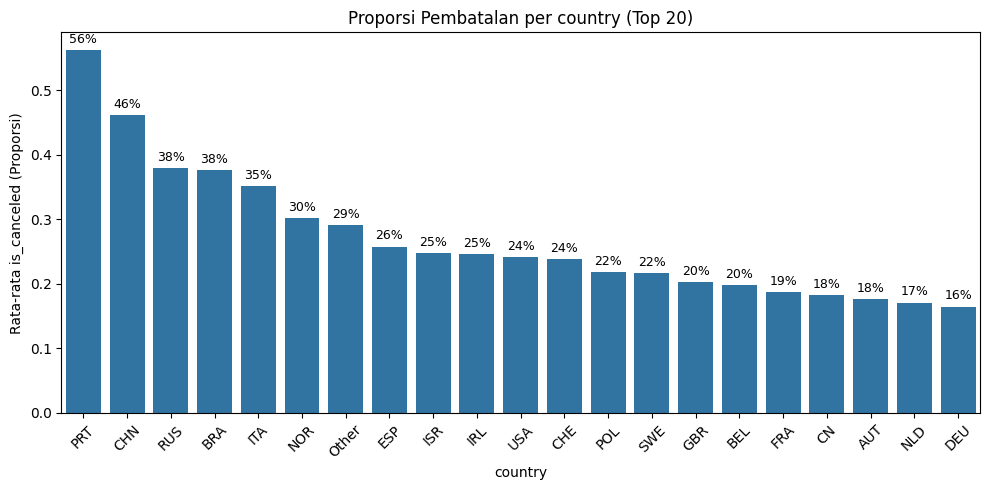

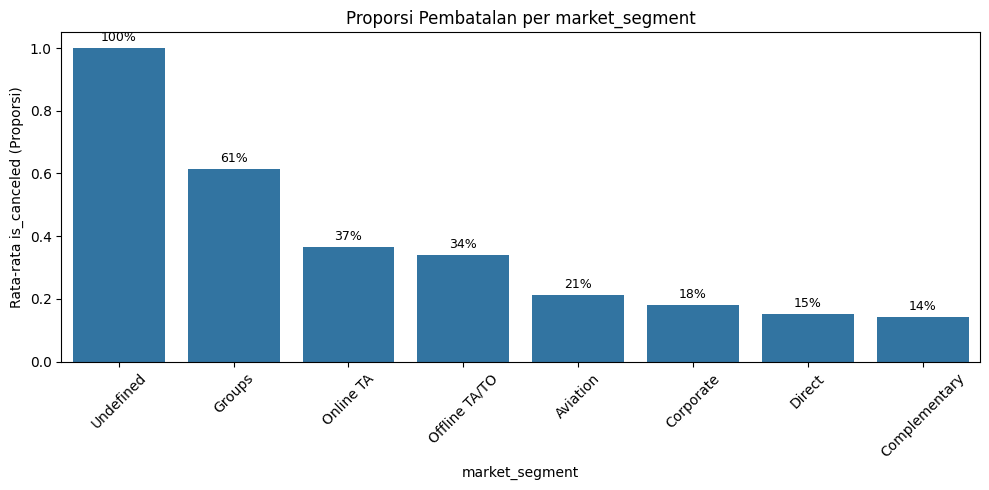

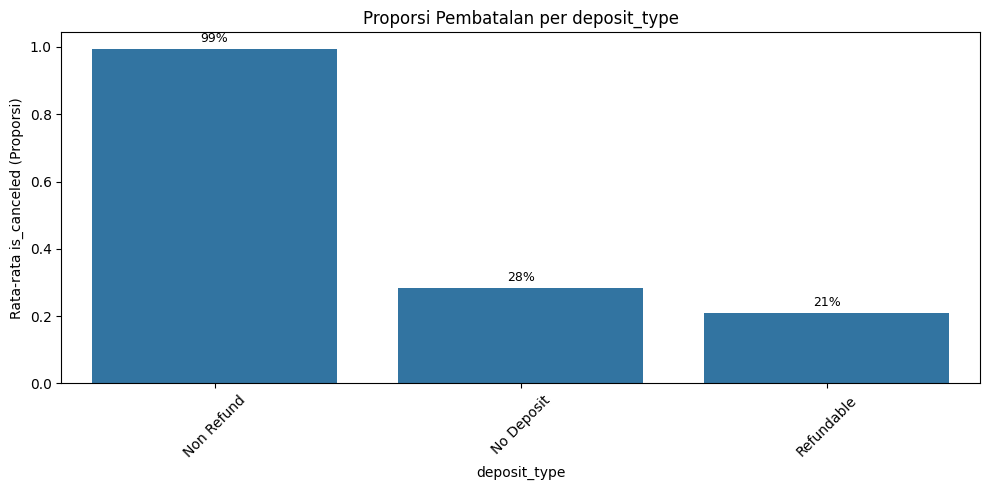

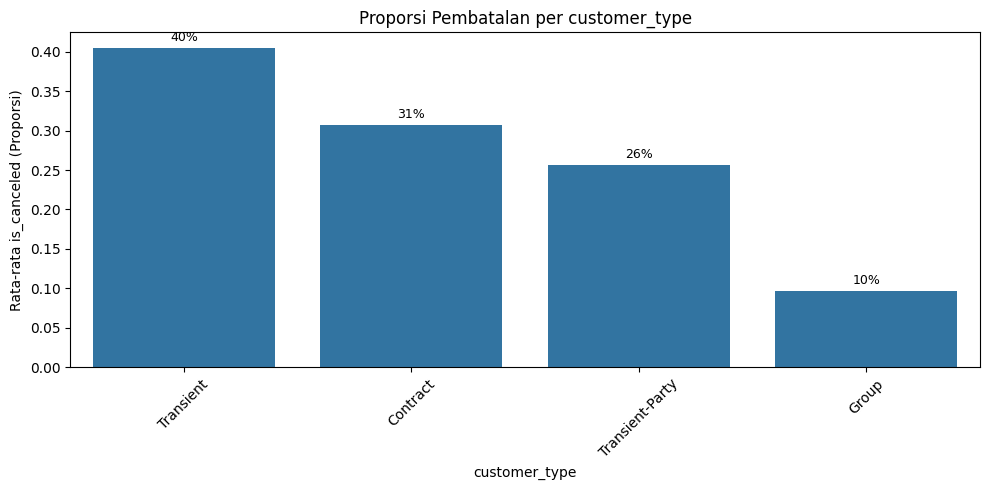

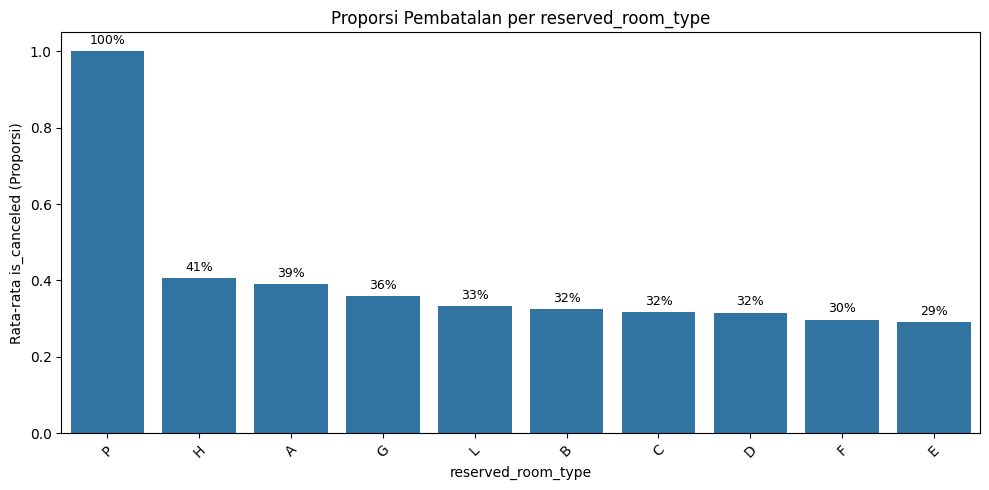

In [13]:
# Mengelompokkan kolom kategorik berdasarkan proporsi pembatalan
for col in cat_cols:
    # Hitung frekuensi tiap kategori
    top_categories = df[col].value_counts().nlargest(20).index

    # Ganti kategori yang tidak termasuk top 20 menjadi 'Other'
    df_temp = df.copy()
    df_temp[col] = df_temp[col].apply(lambda x: x if x in top_categories else 'Other')

    # Urutkan kategori berdasarkan rasio pembatalan
    order = df_temp.groupby(col)['is_canceled'].mean().sort_values(ascending=False).index

    # Plot
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=col, y='is_canceled', data=df_temp, estimator=np.mean, ci=None, order=order)
    if len(df_temp[col].unique()) >= 20:
        plt.title(f'Proporsi Pembatalan per {col} (Top 20)')
    else:
        plt.title(f'Proporsi Pembatalan per {col}')
    plt.ylabel('Rata-rata is_canceled (Proporsi)')
    plt.xticks(rotation=45)

    # Tambahkan label angka (persentase)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0%}',  # Format persen, misal 0.45 jadi "45.00%"
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 3), textcoords='offset points')

    plt.tight_layout()
    plt.show()


In [14]:
df[df["deposit_type"] == "Non Refund"]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
6,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
9,PRT,Groups,1,0,Non Refund,0,Contract,A,0,0,1
12,PRT,Groups,1,0,Non Refund,0,Transient,A,0,0,1
14,PRT,Offline TA/TO,0,0,Non Refund,3,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83541,PRT,Offline TA/TO,0,0,Non Refund,0,Transient,A,0,0,1
83542,PRT,Offline TA/TO,0,0,Non Refund,0,Transient,A,0,0,1
83558,PRT,Offline TA/TO,0,0,Non Refund,101,Transient,A,0,0,1
83560,PRT,Offline TA/TO,1,0,Non Refund,0,Transient,A,0,0,1


* Sebanyak 56% pemesanan dari pelanggan asal Portugal dibatalkan. Meskipun tergolong tinggi, angka ini masih wajar mengingat pelanggan lokal cenderung melakukan pemesanan di beberapa hotel sebelum menentukan pilihan akhir.
* Menariknya, posisi kedua dengan tingkat pembatalan tertinggi ditempati oleh pelanggan asal Tiongkok, dengan persentase pembatalan mencapai 46%, padahal negara tersebut tidak termasuk 10 negara asal customer terbanyak
* Dari sisi `market_segment`, pembatalan paling banyak terjadi pada segmen group, dengan catatan kategori undefined hanya mencakup satu pemesanan sehingga dapat diabaikan.
* Berdasarkan `deposit_type`, hampir seluruh tamu dengan tipe Non Refund membatalkan pemesanan, yaitu sekitar 99%. Hal ini menunjukkan bahwa kebijakan Non Refund tidak selalu efektif dalam menekan angka pembatalan.
* Dengan tingkat pembatalan 100% dan permintaan yang rendah, tipe kamar P sebaiknya dievaluasi lebih lanjut. Alternatifnya, ruangan tersebut dapat dialihkan untuk tipe kamar lain yang memiliki tingkat okupansi lebih tinggi.

### Hubungan Kolom-Kolom Numerikal yang Akan Dijadikan Fitur Terhadap Target

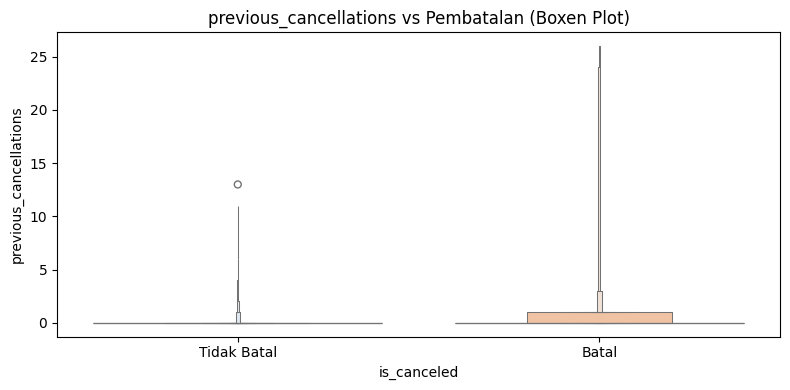

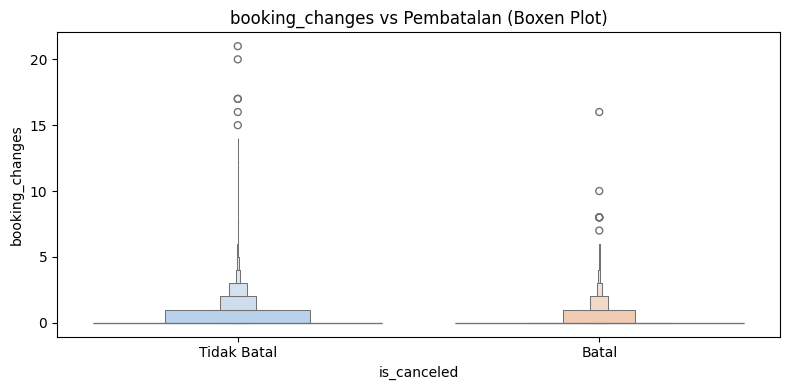

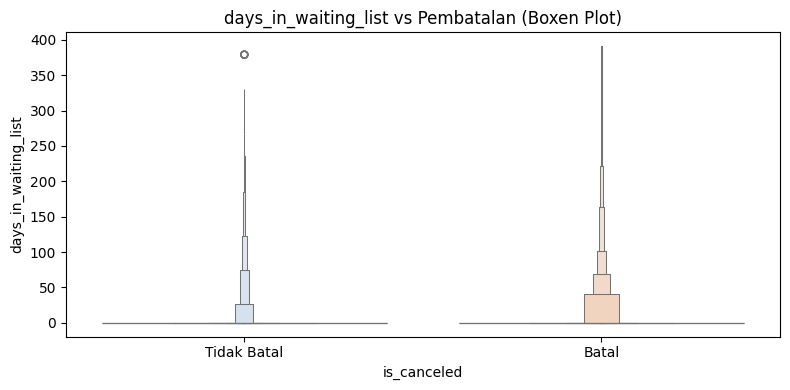

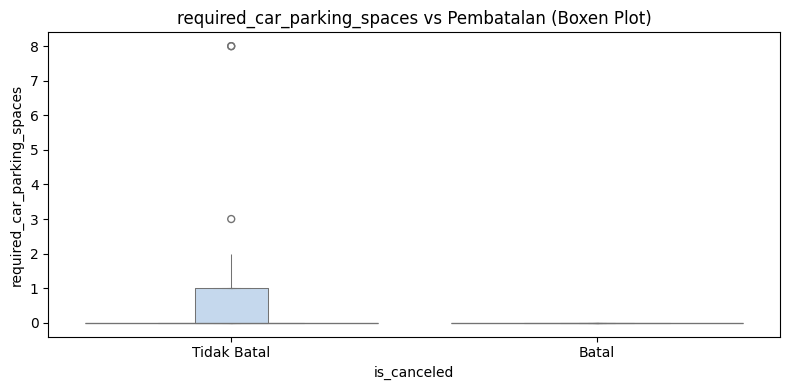

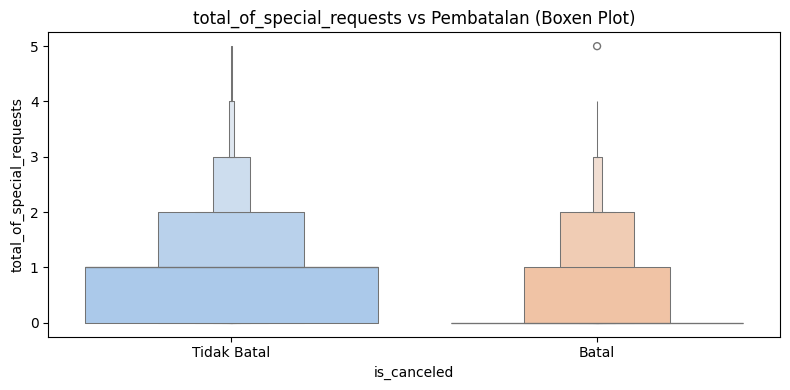

In [15]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxenplot(x='is_canceled', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Pembatalan (Boxen Plot)')
    plt.xticks([0, 1], ['Tidak Batal', 'Batal'])
    plt.tight_layout()
    plt.show()


Berdasarkan visualisasi di atas kita dapati bahwa
* Riwayat pembatalan sebelumnya menjadi indikator kuat: tamu yang pernah membatalkan cenderung mengulangi perilaku serupa.
* Sebaliknya, tamu yang melakukan perubahan pada pemesanan justru menunjukkan komitmen lebih tinggi untuk tetap melanjutkan reservasi.
* Kehadiran dengan kendaraan pribadi menjadi sinyal positif — tamu yang datang dengan mobil hampir tidak pernah membatalkan pesanannya.
* Menariknya, tamu yang memiliki permintaan khusus justru lebih konsisten dalam mempertahankan pemesanannya dibanding yang tidak memiliki permintaan apa pun.


## Data Preprocessing and Feature Engineering

Sebelum train model machine learning data perlu dipersiapkan terlebih dahulu, begitupun fitur2nya beberapa pengaturan yang dilakukan antara lain:

* Drop `market_segment` Undefined langsung pada DataFrame  
* Imputing missing value pada kolom `country` dengan konstanta  
* Binning pada kolom numerik agar outlier tidak terlalu ekstrim  
* Penyesuaian pada kolom `required_car_parking_spaces` menjadi `needs_car_parking_spaces`  
* One hot encoding pada kolom `deposit_type`, `customer_type`, `reserved_room_type`, `needs_car_parking_spaces` karena jumlah unique yang tidak terlalu banyak
* Binary encoding pada kolom `country`, `market_segment`, `reserved_room_type` karena jumlah unique yang cukup besar
* Ordinal encoding pada kolom hasil binning karena kolom-kolom tersebut 
* Robust scaling pada kolom `total_of_special_requests`   

Pengaturan dilakukan setelah spliting guna menghindari information leakage (selain Drop `market_segment` Undefined), beberapa dilakukan manual beberapa dilakukan dengan pipeline.  

Penjelasan lebih banyaknya bisa dilihat di setiap stepnya

### Drop `market_segment` Undefined

Sebelumnya pada segmen EDA kita dapati Undefined adalah nilai pada kolom `market_segment` yang hanya berjumlah 1, baris ini akan didrop karena akan menimbulkan masalah saat pengembangan model, dimana data yang hanya berjumlah satu 


In [16]:
df = df[df['market_segment'] != 'Undefined']

### Pemisahan fitur dan target

In [17]:
features = df.drop(columns= "is_canceled").columns.to_list()
target = ["is_canceled"]

In [18]:
X = df[features]
y = df[target]

In [19]:
# 1. Fallback Handling Function
def replace_rare_categories_not_in(df, cat_cols, valid_categories):
    df_copy = df.copy()
    for col in cat_cols:
        df_copy[col] = df_copy[col].apply(lambda x: x if x in valid_categories[col] else 'Other')
    return df_copy

# 2. Tentukan kategori valid
valid_categories = {
    'market_segment': ['Online TA', 'Offline TA/TO', 'Direct', 'Groups'],
    'distribution_channel': ['TA', 'Direct', 'Corporate'],
    # Tambahkan kategori valid lainnya sesuai data
}

# 3. Kolom kategorikal yang perlu diproses
cat_cols = ['market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']

### Data Splitting

Data train 80%, data test 20%. Tidak lupa stratify agar pembagian data seimbang

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # supaya hasilnya konsisten
    stratify=y        # menjaga proporsi target (penting untuk class imbalance)
)

>## Preprocessing

### Mengisi missing value pada country dengan konstanta unknown

In [21]:
# Imputing manual antisipasi error
X_train["country"].fillna("unknown", inplace= True)
X_test["country"].fillna("unknown", inplace= True)

### Mengambil top 15 country, menggabungkan sisanya menjadi "Other"

Berdasarkan EDA kolom country berisi banyak unique hingga lebih dari 100, untuk menyederhanakan model kita hanya akan mengambil top 15 karena proporsi total value top 15 mewakili 90%, 10% sisanya digabungkan menjadi other

In [22]:
top_15_countries = df["country"].value_counts().sort_values(ascending=False).head(15)
print(f"Proporsi top 15 country {top_15_countries.sum()}")
# Perbandingan top 15 dari total entri
print(f"Proporsi top 15 country dari total entri dalam persentase {(top_15_countries.sum()/df.shape[0])*100}")

Proporsi top 15 country 75798
Proporsi top 15 country dari total entri dalam persentase 90.69784138228114


In [23]:
X_train['country'] = X_train['country'].apply(lambda x: x if x in top_15_countries else 'Other')
X_test['country'] = X_test['country'].apply(lambda x: x if x in top_15_countries else 'Other')

### Mengubah `required_car_parking_spaces` menjadi `needs_car_parking_spaces`

Kolom `required_car_parking_spaces` diubah menjadi fitur biner `needs_car_parking_space` karena berdasarkan EDA kolom ini didominasi nilai 0 dan tidak ada pembatalan terjadi saat tamu membutuhkan parkir.

In [24]:
# Merubah format parking spaces
X_train["required_car_parking_spaces"] = X_train["required_car_parking_spaces"].apply(lambda x: "Yes" if x > 0 else "No")
X_test["required_car_parking_spaces"] = X_test["required_car_parking_spaces"].apply(lambda x: "Yes" if x > 0 else "No")
# Mengganti nama kolom
X_train.rename(columns= {"required_car_parking_spaces" : "needs_car_parking_spaces"}, inplace=True)
X_test.rename(columns= {"required_car_parking_spaces" : "needs_car_parking_spaces"}, inplace=True)

### Pengaturan pada kolom `previous_cancellations`

#### Binning pada kolom `previous_cancellations`

In [25]:
def bin_previous_cancellations(x):
    if x == 0:
        return 'No Previous'
    elif 1 <= x <= 2:
        return 'Few (1-2)'
    elif 3 <= x <= 9:
        return 'Moderate (3-9)'
    else:  # x >= 10
        return 'Many (10+)'

X_train['previous_cancellations_bin'] = X_train['previous_cancellations'].apply(bin_previous_cancellations)
X_test['previous_cancellations_bin'] = X_test['previous_cancellations'].apply(bin_previous_cancellations)

#### Menambah fitur biner untuk mengklasifikasi tamu yang pernah melakukan pembatalan

In [26]:
X_train['was_cancel'] = (X_train['previous_cancellations'] > 0).astype(int)
X_test['was_cancel'] = (X_test['previous_cancellations'] > 0).astype(int)

#### Membuang kolom `previous_cancellations` yang belum dilakukan binning

In [27]:
X_train.drop(columns="previous_cancellations",inplace=True)
X_test.drop(columns="previous_cancellations",inplace=True)

#### Pengurutan binning

In [28]:
category_order = ['No Previous', 'Few (1-2)', 'Moderate (3-9)', 'Many (10+)']

# Terapkan urutan kategori kustom
X_train['previous_cancellations_bin'] = pd.Categorical(X_train['previous_cancellations_bin'], categories=category_order, ordered=True)
X_test['previous_cancellations_bin'] = pd.Categorical(X_test['previous_cancellations_bin'], categories=category_order, ordered=True)

### Pengaturan pada kolom `days_in_waiting_list`

#### Binning pada kolom `days_in_waiting_list`

In [29]:
def bin_waiting_days(x):
    if x == 0:
        return 'No Wait'
    elif x <= 7:
        return 'Short Wait (1-7)'
    elif x <= 30:
        return 'Medium Wait (8-30)'
    else:
        return 'Long Wait (30+)'

X_train['waiting_list_bin'] = X_train['days_in_waiting_list'].apply(bin_waiting_days)
X_test['waiting_list_bin'] = X_test['days_in_waiting_list'].apply(bin_waiting_days)

#### Menambah fitur biner untuk mengklasifikasi tamu yang menunggu di waiting list

In [30]:
X_train['was_on_waiting_list'] = (X_train['days_in_waiting_list'] > 0).astype(int)
X_test['was_on_waiting_list'] = (X_test['days_in_waiting_list'] > 0).astype(int)

#### Membuang kolom `days_in_waiting_list` yang belum dilakukan binning

In [31]:
X_train.drop(columns= "days_in_waiting_list",inplace=True)
X_test.drop(columns= "days_in_waiting_list",inplace=True)

#### Pengurutan binning

In [32]:
category_order = ['No Wait', 'Short Wait (1-7)', 'Medium Wait (8-30)', 'Long Wait (30+)']

# Terapkan urutan kategori kustom
X_train['waiting_list_bin'] = pd.Categorical(X_train['waiting_list_bin'], categories=category_order, ordered=True)
X_test['waiting_list_bin'] = pd.Categorical(X_test['waiting_list_bin'], categories=category_order, ordered=True)

### Pengaturan pada kolom `booking_changes`

#### Binning pada kolom `booking_changes`

In [33]:
def bin_booking_changes(x):
    if x == 0:
        return 'No Change'
    elif x == 1:
        return 'One Change'
    elif x <= 3:
        return 'Few Changes (2-3)'
    else:
        return 'Many Changes (4+)'

X_train['booking_changes_bin'] = X_train['booking_changes'].apply(bin_booking_changes)
X_test['booking_changes_bin'] = X_test['booking_changes'].apply(bin_booking_changes)

#### Menambah fitur biner untuk mengklasifikasi tamu yang pernah melakukan perubahan booking

In [34]:
X_train['has_changed_booking'] = (X_train['booking_changes'] > 0).astype(int)
X_test['has_changed_booking'] = (X_test['booking_changes'] > 0).astype(int)

#### Membuang kolom `booking_changes` yang belum dilakukan binning

In [35]:
X_train.drop(columns= "booking_changes",inplace=True)
X_test.drop(columns= "booking_changes",inplace=True)

#### Pengurutan binning

In [36]:
category_order = ['No Change', 'One Change', 'Few Changes (2-3)', 'Many Changes (4+)']

# Terapkan urutan kategori kustom
X_train['booking_changes_bin'] = pd.Categorical(X_train['booking_changes_bin'], categories=category_order, ordered=True)
X_test['booking_changes_bin'] = pd.Categorical(X_test['booking_changes_bin'], categories=category_order, ordered=True)

### Mengubah format `reseverved_room_types`

Berdasarkan hasil EDA sebelumnya, tipe kamar `reserved_room_type` 'P' dan 'L' memiliki jumlah yang sangat sedikit. Oleh karena itu, kedua tipe kamar ini digabung ke dalam kategori 'Other' untuk menyederhanakan fitur dan mengurangi risiko overfitting.

In [37]:
rare_rooms = ['P', 'L']

X_train['reserved_room_type'] = X_train['reserved_room_type'].apply(
    lambda x: x if x not in rare_rooms else 'Other'
)

X_test['reserved_room_type'] = X_test['reserved_room_type'].apply(
    lambda x: x if x not in rare_rooms else 'Other'
)

In [38]:
X_train["reserved_room_type"].unique()

array(['A', 'F', 'D', 'G', 'E', 'C', 'H', 'B', 'Other'], dtype=object)

>## Training Model

## Baseline Model (LogReg, KNN, Decision Tree) Tanpa Hyperparameter Tuning

Pertama - tama mari kita train model machine learning dengan baseline model (LogReg, KNN, Decision Tree) tanpa hyper parameter tuning, kita akan melihat nilai score rata2 validasi dan score prediksinya

#### Validasi Model dengan Cross-Validation

In [39]:
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

In [40]:
models = [logreg,knn,tree]
score=[]
rata=[]
std=[]

transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) # Scaling penting untuk KNN dan LogReg tetapi tidak berpenagruh banyak pada Decision Tree
                                ], remainder='passthrough')

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    # simpan data hasil train dalam variabel tersendiri
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

df_baseline_model_without_hp = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # simpan data hasil train dalam df agar mudah di analisis
df_baseline_model_without_hp

,mean recall,sdev
model,,
Decision Tree,0.695951,0.008388
KNN,0.664430,0.035585
Logistic Regression,0.532673,0.026924


#### Prediksi dan Evaluasi pada Data Test

In [41]:
models = [logreg,knn,tree]
score_recall = []

transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) # Scaling penting untuk KNN dan LogReg tetapi tidak berpenagruh banyak pada Decision Tree
                                ], remainder='passthrough')

def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.77      0.94      0.85     10559
           1       0.83      0.52      0.64      6156

    accuracy                           0.78     16715
   macro avg       0.80      0.73      0.74     16715
weighted avg       0.79      0.78      0.77     16715

KNN 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     10559
           1       0.74      0.64      0.69      6156

    accuracy                           0.78     16715
   macro avg       0.77      0.76      0.76     16715
weighted avg       0.78      0.78      0.78     16715

Decision Tree 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0

,recall score
model,
Decision Tree,0.698668
KNN,0.642788
Logistic Regression,0.516082


#### **Kesimpulan hasil train base model tanpa hyperparameter tuning**

Tanpa hyperparameter tuning, Decision Tree muncul sebagai model terbaik dengan mean CV recall 0.695951 dan standar deviasi yang rendah (0.008388), menunjukkan performa yang stabil. Konsistensi ini juga terlihat pada evaluasi data test yang menghasilkan recall 0.698868 — nilai yang sangat dekat dengan hasil CV. Di sisi lain, model KNN dan Logistic Regression juga menunjukkan stabilitas yang baik, namun recall yang dihasilkan masih berada di bawah Decision Tree.

Berikutnya mari kita coba lakukan hyperparameter tuning dan tinjau perkembangannya

## Base Model (LogReg, KNN, Decision Tree) Dengan Hyperparameter Tuning


### **LogReg** with Hyperparameter Tuning 

#### Validasi Model dengan Cross-Validation

In [42]:
transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) # robust scaling agar tahan outlier
                                ], remainder='passthrough')

pipeline_logreg = Pipeline([
    ('preprocessor', transformer),          
    ('logreg', LogisticRegression(solver= "liblinear", random_state= 42)) 
    ]) # verbose pada pipeline untuk menampilakn prosesnya

hyperparam_space = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'logreg__solver': ['liblinear', 'saga'],  
}

skfold = StratifiedKFold(n_splits = 5)


random_search = RandomizedSearchCV(
    estimator=pipeline_logreg,
    param_distributions=hyperparam_space, 
    n_iter=50,  
    cv=skfold,  
    scoring='recall',
    n_jobs=-1,
    random_state=42,
    verbose=1 
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
logreg_with_hp_mean = mean_overall
logreg_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Best Parameters: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__C': 10}
Best CV Score: 0.53831898460663
Rata-rata keseluruhan skor CV: 0.512103446154819
Standar Deviasi dari skor CV: 0.04622236613620627


#### Prediksi dan Evaluasi pada Data Test

In [43]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.5160818713450293
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     10559
           1       0.83      0.52      0.64      6156

    accuracy                           0.78     16715
   macro avg       0.80      0.73      0.74     16715
weighted avg       0.79      0.78      0.77     16715



### KNN with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [44]:
transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust scaler', RobustScaler(), ["total_of_special_requests"]) # Scaling dengan standard sclaer karena outlier sudah ditangani
                                ], remainder='passthrough')

pipeline_knn = Pipeline([
    ('preprocessor', transformer),          # Step 1: Preprocessing pakai ColumnTransformer
    ('knn', KNeighborsClassifier()) 
    ])

hyperparam_space = {
    'knn__n_neighbors': [3, 5 ,9],
    'knn__weights': ['distance'], # 'distance'
    'knn__metric': ['euclidean', 'manhattan'] # 'euclidean', 'manhattan'
}

skfold = StratifiedKFold(n_splits = 5)


random_search = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=hyperparam_space,  
    n_iter=50, 
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1, 
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
knn_with_hp_mean = mean_overall
knn_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'euclidean'}
Best CV Score: 0.6837238182815341
Rata-rata keseluruhan skor CV: 0.6618782976711325
Standar Deviasi dari skor CV: 0.019024531265408207


#### Prediksi dan Evaluasi pada Data Test

In [45]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.684535412605588
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     10559
           1       0.71      0.68      0.70      6156

    accuracy                           0.78     16715
   macro avg       0.77      0.76      0.76     16715
weighted avg       0.78      0.78      0.78     16715



### Decision Tree with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [46]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]) # Tidak memerlukan scaling
                                ], remainder='passthrough')

pipeline_tree = Pipeline([
    ('preprocessor', transformer), # Step 1: Preprocessing pakai ColumnTransformer
    ('tree', DecisionTreeClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [2, 3, 4, 5],
    'tree__min_samples_split': [2, 5],
    'tree__min_samples_leaf': [2, 4],
    'tree__max_features': ['sqrt', 'log2'],
    'tree__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_tree,
    param_distributions=hyperparam_space,
    n_iter=50,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=42, 
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
tree_with_hp_mean = mean_overall
tree_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'tree__min_samples_split': 5, 'tree__min_samples_leaf': 4, 'tree__max_features': 'log2', 'tree__max_depth': 3, 'tree__criterion': 'entropy', 'tree__class_weight': 'balanced'}
Best CV Score: 0.9384265608827785
Rata-rata keseluruhan skor CV: 0.7770266021187017
Standar Deviasi dari skor CV: 0.17698986362860028


Jika kita perhatikan perbedaan best cv score dengan rata2nya cukup signifikan, bisa dikatakan model decision tree kurang konsisten.

#### Prediksi dan Evaluasi pada Data Test

In [47]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.9381091617933723
              precision    recall  f1-score   support

           0       0.85      0.21      0.33     10559
           1       0.41      0.94      0.57      6156

    accuracy                           0.48     16715
   macro avg       0.63      0.57      0.45     16715
weighted avg       0.69      0.48      0.42     16715



In [48]:
df_baseline_model_without_hp

,mean recall,sdev
model,,
Decision Tree,0.695951,0.008388
KNN,0.664430,0.035585
Logistic Regression,0.532673,0.026924


In [49]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']

rata = [logreg_with_hp_mean, knn_with_hp_mean, tree_with_hp_mean]
std = [logreg_with_hp_std, logreg_with_hp_std, tree_with_hp_std]

df_cv_result_baseline_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_baseline_with_hp


,mean recall,sdev
model,,
Decision Tree,0.777027,0.176990
KNN,0.661878,0.046222
Logistic Regression,0.512103,0.046222


### Kesimpulan Hasil Train Base Model

Setelah dilakukan hyperparameter tuning, Decision Tree menunjukkan peningkatan mean CV Recall yang cukup signifikan, dari 0.695951 menjadi 0.777027. Namun peningkatan ini diikuti oleh lonjakan standar deviasi yang besar, yakni hingga 0.176990, menandakan performa model menjadi jauh lebih tidak stabil. Ketidakstabilan ini terlihat dari best CV score yang sangat tinggi (0.93810), sementara rata-ratanya hanya 0.777027, menunjukkan model sangat baik pada sebagian fold tetapi buruk pada fold lainnya. Di sisi lain, model KNN hanya mengalami peningkatan kecil dan Logistic Regression justru sedikit menurun, sehingga tuning tidak memberikan dampak berarti pada kedua model tersebut.

Setelah memahami performa model baseline, kini saatnya melihat apakah model ensemble dapat memberikan generalisasi yang lebih baik.

## Ensemble Model (Random Forest, Xgboost, lgb) Tanpa Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [50]:
rf = RandomForestClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42, eval_metric= 'logloss')
lgbm = lgb.LGBMClassifier(random_state= 42, verbosity= -1)

In [51]:
models = [rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
df_ensemble_model_without_hp = pd.DataFrame({'model':['Random Forest', 'XGBoost', 'LightGBM'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
df_ensemble_model_without_hp

,mean recall,sdev
model,,
Random Forest,0.699768,0.010187
LightGBM,0.688274,0.008982
XGBoost,0.686649,0.004464


#### Prediksi dan Evaluasi pada Data Test

In [52]:
models = [rf,xgb,lgbm]
score_recall = []

transformer = ColumnTransformer([
                                 ('ohe',OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"])
                                ], remainder='passthrough')

def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

pd.DataFrame({
    'model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)

Random Forest 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715

XGBoost 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     10559
           1       0.78      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715

LightGBM 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     10559
           1       0.78      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.81      0.81    

,recall score
model,
Random Forest,0.704678
LightGBM,0.684211
XGBoost,0.682749


Tanpa melakukan hyperparameter tuning, Random Forest memperoleh skor tertinggi yaitu **0.699768**, sedikit lebih tinggi dibandingkan LightGBM (**0.688274**) dan XGBoost (**0.686649**). Namun, XGBoost merupakan model yang paling stabil karena memiliki standar deviasi terendah, yaitu **0.004464**.

Berikutnya, kita akan melakukan hyperparameter tuning pada ketiga model tersebut dan meninjau kembali hasilnya.

## Ensemble Model (Random Forest, XGBoost, LightGBM) Dengan Hyperparameter Tuning

### Random Forest with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [53]:
transformer = ColumnTransformer([
                                 ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
                                 ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
                                 ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"]),
                                 ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) 
                                ], remainder='passthrough')

pipeline_rf = Pipeline([
    ('preprocessor', transformer),         
    ('rf', RandomForestClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_leaf': [3, 5, 7],
    'rf__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=hyperparam_space,  
    n_iter=50,  
    cv=skfold,   
    scoring='recall',  
    n_jobs=-1,  
    random_state=42,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
rf_with_hp_mean = mean_overall
rf_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_leaf': 3, 'rf__max_depth': 20, 'rf__class_weight': 'balanced'}
Best CV Score: 0.7785224508983244
Rata-rata keseluruhan skor CV: 0.7528532681530843
Standar Deviasi dari skor CV: 0.02071987791144803


### Save dan load model

In [54]:
# Simpan model supaya gak lama train ulang
import joblib

# joblib.dump(random_search.best_estimator_, "RS_rf_recall_FINAL.pkl")
# joblib.dump(random_search.best_params_, "RS_rf_best_params.pkl")
# joblib.dump(random_search.cv_results_, "RS_rf_cv_results.pkl")

final_model_rf = joblib.load("RS_rf_recall_FINAL.pkl")
best_model_rf = final_model_rf

### Menyimpan Mean dan Standar Deviasi Model

In [55]:
rf_with_hp_cv = joblib.load("RS_rf_cv_results.pkl")
rf_with_hp_mean = rf_with_hp_cv['mean_test_score'].mean()
rf_with_hp_std = rf_with_hp_cv['mean_test_score'].std()
print("Rata-rata keseluruhan skor CV:", rf_with_hp_mean)
print("Standar Deviasi dari skor CV:", rf_with_hp_std)

Rata-rata keseluruhan skor CV: 0.7528532681530843
Standar Deviasi dari skor CV: 0.02071987791144803


#### Prediksi dan Evaluasi pada Data Test

In [56]:
y_pred = best_model_rf.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.7722547108512021
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     10559
           1       0.70      0.77      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.78     16715
weighted avg       0.80      0.80      0.80     16715



Begitupula pada prediksi, terlihat performa model cukup baik mengingat sekornya tidak jauh dengan skor validasinya

### XGBoost with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [57]:
# # Ekslporasi

# transformer = ColumnTransformer([
#                                  ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
#                                  ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
#                                  ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"])
#                                 ], remainder='passthrough')

# pipeline_xgb = Pipeline([
#     ('preprocessor', transformer),          # Step 1: Preprocessing pakai ColumnTransformer
#     ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state= 42))
#     ])

# param_dist = {
#     'xgb__n_estimators': [100, 200],
#     'xgb__learning_rate': uniform(0.01, 0.3),  # uniform distribution untuk learning rate
#     'xgb__max_depth': [3, 4, 5, 6],
#     'xgb__min_child_weight': [2, 3],
#     'xgb__subsample': uniform(0.6, 0.4),  # random sampling dari subset data
#     'xgb__colsample_bytree': uniform(0.6, 0.4),  # random sampling untuk kolom
#     'xgb__gamma': uniform(0, 2),
#     'xgb__reg_lambda': [0, 1, 5, 10],  
#     'xgb__reg_alpha': [0, 0.1, 0.5, 1]  
# }

# skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


# random_search = RandomizedSearchCV(
#     estimator=pipeline_xgb,
#     param_distributions=param_dist,  
#     n_iter=20,  
#     cv=skfold,  
#     scoring='recall',  
#     n_jobs=-1,  
#     random_state=42,  
#     verbose=1  
# )

# random_search.fit(X_train, y_train)

# cv_scores = random_search.cv_results_['mean_test_score']
# mean_overall = np.mean(cv_scores)
# std_dev = np.std(cv_scores)

# # Menyimpan rata2 dan standard deviasi model
# xgb_with_hp_mean = mean_overall
# xgb_with_hp_std = std_dev

# print("Best Parameters:", random_search.best_params_)
# print("Best CV Score:", random_search.best_score_)
# print("Rata-rata keseluruhan skor CV:", mean_overall)
# print("Standar Deviasi dari skor CV:", std_dev)


### Save dan load model

In [58]:
# Simpan model supaya gak lama train ulang
import joblib

# joblib.dump(random_search.best_estimator_, "RS_xgb_recall_FINAL.pkl")
# joblib.dump(random_search.best_params_, "RS_xgb_best_params.pkl")
# joblib.dump(random_search.cv_results_, "RS_xgb_cv_results.pkl")

final_model_xgb = joblib.load("RS_xgb_recall_FINAL.pkl")
best_model_xgb = final_model_xgb

### Menyimpan Mean dan Standar Deviasi Model

In [59]:
xgb_with_hp_cv = joblib.load("RS_xgb_cv_results.pkl")
xgb_with_hp_mean = xgb_with_hp_cv['mean_test_score'].mean()
xgb_with_hp_std = xgb_with_hp_cv['mean_test_score'].std()
print("Rata-rata keseluruhan skor CV:", xgb_with_hp_mean)
print("Standar Deviasi dari skor CV:", xgb_with_hp_std)

Rata-rata keseluruhan skor CV: 0.6511551567583616
Standar Deviasi dari skor CV: 0.06635029832990715


#### Prediksi dan Evaluasi pada Data Test

In [60]:
y_pred = best_model_xgb.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.6835607537361923
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     10559
           1       0.78      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



### LightGBM with Hyperparameter Tuning

catatan lgm tidak memerlukan scaling dan juga binning
learning rate kecil n estimator besar

lgbm baru, ubah estimator lebih besar dan learning rate lebih kecil, n_iter di random search dinaikkan

catatan: running terlalu lama perbedaan tidak signifikan 

#### Validasi Model dengan Cross-Validation

In [61]:
# # Eksplorasi

# transformer = ColumnTransformer([
#                                  ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces"]),
#                                  ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
#                                  ('bin_enc', ce.BinaryEncoder(), ["country", "market_segment", "reserved_room_type"])
#                                 ], remainder='passthrough')

# pipeline_lgbm = Pipeline([
#     ('preprocessor', transformer),          # Step 1: Preprocessing pakai ColumnTransformer
#     ('lgbm', LGBMClassifier(random_state=42, n_jobs=-1))
#     ])

# param_dist = {
#     'lgbm__num_leaves': randint(20, 150),
#     'lgbm__max_depth': randint(3, 15),
#     'lgbm__learning_rate': uniform(0.01, 0.03),
#     'lgbm__n_estimators': randint(1000, 3000),
#     'lgbm__min_child_samples': randint(10, 100),
#     'lgbm__subsample': uniform(0.6, 0.4),
#     'lgbm__colsample_bytree': uniform(0.6, 0.4),
#     'lgbm__reg_alpha': uniform(0.0, 2.0),
#     'lgbm__reg_lambda': uniform(0.0, 2.0),
# }

# skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


# random_search = RandomizedSearchCV(
#     estimator=pipeline_lgbm,
#     param_distributions=param_dist, 
#     n_iter=50,  
#     cv=skfold,  
#     scoring='recall',  
#     n_jobs=-1,  
#     random_state=42,  
#     verbose=1  
# )

# random_search.fit(X_train, y_train)

# cv_scores = random_search.cv_results_['mean_test_score']
# mean_overall = np.mean(cv_scores)
# std_dev = np.std(cv_scores)

# # Menyimpan rata2 dan standard deviasi model
# lgbm_with_hp_mean = mean_overall
# lgbm_with_hp_std = std_dev

# print("Best Parameters:", random_search.best_params_)
# print("Best CV Score:", random_search.best_score_)
# print("Rata-rata keseluruhan skor CV:", mean_overall)
# print("Standar Deviasi dari skor CV:", std_dev)

### Save dan load model

In [62]:
# Simpan model supaya gak lama train ulang

# Jangan run lagi kalau sudah disimpan
# joblib.dump(random_search.best_estimator_, "RS_lgbm_recall_FINAL.pkl")
# joblib.dump(random_search.best_params_, "RS_lgbm_best_params.pkl")
# joblib.dump(random_search.cv_results_, "RS_lgbm_cv_results.pkl")

# load kalau sudah disimpan
final_model_lgbm = joblib.load("RS_lgbm_recall_FINAL.pkl")
best_model_lgbm = final_model_lgbm

In [63]:
lgbm_with_hp_cv = joblib.load("RS_lgbm_cv_results.pkl")
lgbm_with_hp_mean = lgbm_with_hp_cv['mean_test_score'].mean()
lgbm_with_hp_std = lgbm_with_hp_cv['mean_test_score'].std()
print("Rata-rata keseluruhan skor CV:", lgbm_with_hp_mean)
print("Standar Deviasi dari skor CV:", lgbm_with_hp_std)

Rata-rata keseluruhan skor CV: 0.6840637362220473
Standar Deviasi dari skor CV: 0.004953511330659816


#### Prediksi dan Evaluasi pada Data Test

In [64]:
y_pred = best_model_lgbm.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.6863222871994802
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     10559
           1       0.78      0.69      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



#### Prediksi dan Evaluasi pada Data Test

Revisi: Jelaskan interpretasi model lebih dalam, jika memungkinkan model per model

## Kesimpulan hasil dari eksplorasi beberapa model

### Berikut adalah performa setiap model

Baseline Model Tanpa Hyperparameter Tuning

In [65]:
df_baseline_model_without_hp

,mean recall,sdev
model,,
Decision Tree,0.695951,0.008388
KNN,0.664430,0.035585
Logistic Regression,0.532673,0.026924


Baseline model dengan hyperparameter tuning

In [66]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']

rata = [logreg_with_hp_mean, knn_with_hp_mean, tree_with_hp_mean]
std = [logreg_with_hp_std, logreg_with_hp_std, tree_with_hp_std]

df_cv_result_baseline_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_baseline_with_hp


,mean recall,sdev
model,,
Decision Tree,0.777027,0.176990
KNN,0.661878,0.046222
Logistic Regression,0.512103,0.046222


Terlihat peningkatan yang signifikan pada Model Decision Tree, hanya saja standard deviasinya terbilang sangat tinggi sehingga bisa dikatakan model kurang konsisten, sedangkan dua model lainnya tidak mengalami banyak perubahan

Ensemble Model Tanpa Hyperparameter Tuning

In [67]:
df_ensemble_model_without_hp

,mean recall,sdev
model,,
Random Forest,0.699768,0.010187
LightGBM,0.688274,0.008982
XGBoost,0.686649,0.004464


Ensemble Model Dengan Hyperparameter Tuning

In [68]:
model_names = ['Random Forest', 'XGBoost', 'LightGBM']

rata = [rf_with_hp_mean, xgb_with_hp_mean, lgbm_with_hp_mean]
std = [rf_with_hp_std, xgb_with_hp_std, lgbm_with_hp_std]

df_cv_result_ensemble_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_ensemble_with_hp

,mean recall,sdev
model,,
Random Forest,0.752853,0.020720
LightGBM,0.684064,0.004954
XGBoost,0.651155,0.066350


Dari beberapa model yang sudah diuji, baseline maupun ensemble, model yang dipilih adalah random forest dengan rata-rata score recall tertinggi dan standard deviasi yang rendah, selanjutnya mari kita dalami model lebih lanjut.

>## Interpretasi dan Contoh Penggunaan Model

kali ini kita akan melakukan retrain pada model yang kita pilih dengan perubahan encoding pada `country`, `market_segment`, `reserved_room_type`, yang sebelumnya dilakukan dengan binary encoding kali ini kita lakukan dengan one hot encoding agar fitur-fitur penting setidaknya bisa lebih terbaca.

Model yang kita pilih adalah Random Forest



### Retrain model terpilih

revisi: cek lagi setiap parameternya, fallbackhandling, 

In [69]:
# # Eksplorasi

# transformer = ColumnTransformer([
#                                  ('ohe', OneHotEncoder(drop='first'), ["deposit_type", "customer_type", "reserved_room_type", "needs_car_parking_spaces", "country", "market_segment", "reserved_room_type"]),
#                                  ('orde', OrdinalEncoder(), ["previous_cancellations_bin", "waiting_list_bin", "booking_changes_bin"]),
#                                  ('robust_scaler', RobustScaler(), ["total_of_special_requests"]) 
#                                 ], remainder='passthrough')

# pipeline_rf = Pipeline([
#     ('preprocessor', transformer),         
#     ('rf', RandomForestClassifier(random_state=42)) 
#     ])

# hyperparam_space = {
#     'rf__n_estimators': [100, 200, 300],
#     'rf__max_depth': [10, 20, None],
#     'rf__min_samples_leaf': [3, 5, 7, 10],
#     'rf__class_weight': ['balanced']
# }

# skfold = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)


# random_search = RandomizedSearchCV(
#     estimator=pipeline_rf,
#     param_distributions=hyperparam_space,  
#     n_iter=50,  
#     cv=skfold,   
#     scoring='recall',  
#     n_jobs=-1,  
#     random_state=42,  
#     verbose=1  
# )

# random_search.fit(X_train, y_train)

# # Mengambil estimator terbaik
# best_model = random_search.best_estimator_
# rf_model = best_model.named_steps['rf']

# # Mengekstrak nama fitur dari tahapan preprocessor pada pipeline
# preprocessor = best_model.named_steps['preprocessor']
# feature_names = preprocessor.get_feature_names_out()

# cv_scores = random_search.cv_results_['mean_test_score']
# mean_overall = np.mean(cv_scores)
# std_dev = np.std(cv_scores)

# print("Best Parameters:", random_search.best_params_)
# print("Best CV Score:", random_search.best_score_)
# print("Rata-rata keseluruhan skor CV:", mean_overall)
# print("Standar Deviasi dari skor CV:", std_dev)

### Save dan load model

In [70]:
# Simpan model supaya gak lama train ulang

# Jangan run lagi kalau sudah disimpan
# joblib.dump(random_search.best_estimator_, "RS_chosen_best_model_recall_FINAL.pkl")
# joblib.dump(random_search.best_params_, "RS_rf_chosen_params.pkl")
# joblib.dump(random_search.cv_results_, "RS_rf_chosen_results.pkl")

# # load kalau sudah disimpan
final_model_chosen = joblib.load("RS_chosen_best_model_recall_FINAL.pkl")
best_model_chosen = final_model_chosen

### Menyimpan Mean dan Standar Deviasi CV

In [71]:
chosen_with_hp_cv = joblib.load("RS_chosen_cv_results.pkl")
chosen_with_hp_mean = chosen_with_hp_cv['mean_test_score'].mean()
chosen_with_hp_std = chosen_with_hp_cv['mean_test_score'].std()
print("Rata-rata keseluruhan skor CV:", chosen_with_hp_mean)
print("Standar Deviasi dari skor CV:", chosen_with_hp_std)

Rata-rata keseluruhan skor CV: 0.7691998077489631
Standar Deviasi dari skor CV: 0.010468184710227991


#### Prediksi dan Evaluasi pada Data Test

In [72]:
y_pred = best_model_chosen.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.7694931773879142
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     10559
           1       0.71      0.77      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.79      0.79     16715
weighted avg       0.80      0.80      0.80     16715



Setelah dilakukan retrain dengan beberapa penyesuaian, terlihat adanya peningkatan pada rata-rata recall score dan penurunan pada standard deviasi antar fold. Hal ini menunjukkan bahwa model menjadi lebih stabil.
Stabilitas ini juga terlihat dari hasil pengujian pada data test, di mana nilai recall tidak jauh berbeda dari rata-rata skor pada cross-validation. Ini mengindikasikan bahwa model tidak hanya fit pada data latih, tetapi juga memiliki performa yang konsisten pada data yang belum pernah dilihat sebelumnya.

### Features importance

In [73]:
# Mengestrak bobot setiap fitur dan membuat dataframe dengan top 10 fitur
rf_model = final_model_chosen.named_steps['rf']

# Mengekstrak nama fitur dari tahapan preprocessor pada pipeline
preprocessor = final_model_chosen.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top10_features = feat_imp.sort_values(by='Importance', ascending=False).head(10)

# Menampilkan top 10 fitur 
display(top10_features)
# Total Fitur
print("Total Fitur:", len(feature_names))

,Feature,Importance
0,ohe__deposit_type_Non Refund,0.171507
26,ohe__country_PRT,0.150653
46,robust_scaler__total_of_special_requests,0.114331
34,ohe__market_segment_Online TA,0.082996
13,ohe__needs_car_parking_spaces_Yes,0.074032
3,ohe__customer_type_Transient,0.043191
43,orde__previous_cancellations_bin,0.040407
33,ohe__market_segment_Offline TA/TO,0.038789
47,remainder__was_cancel,0.036469
32,ohe__market_segment_Groups,0.033056


Total Fitur: 50


### Visualisasi top 10 fitur paling berpengaruh

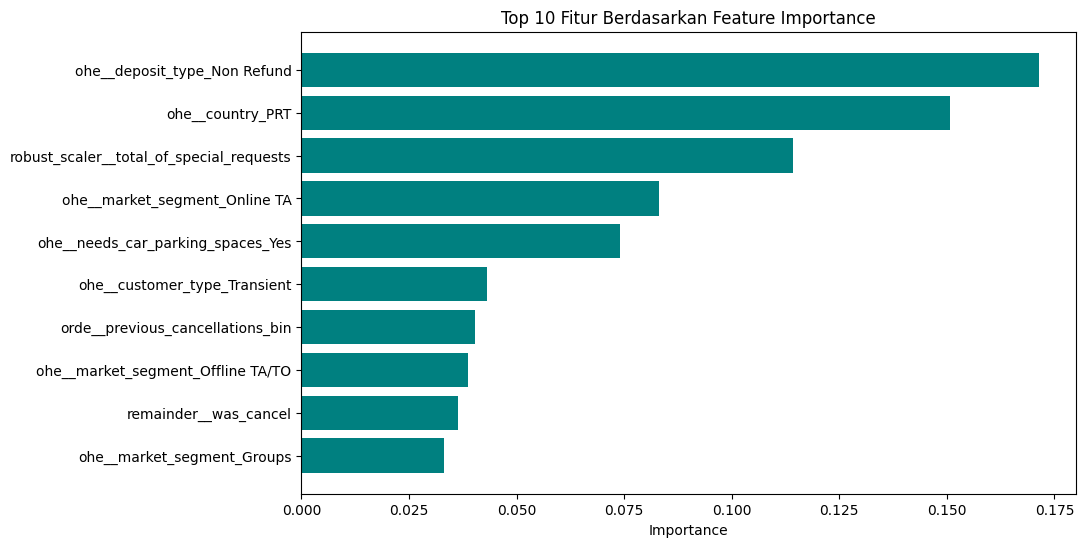

In [74]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_features['Feature'], top10_features['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Top 10 Fitur Berdasarkan Feature Importance')
plt.gca().invert_yaxis()  # Agar fitur dengan importance tertinggi ada di atas
plt.show()

Bar chart di atas adalah 10 fitur terpenting dari total 50 fitur berdasarkan model yang kami pilih. Perlu dicatat bahwa kita hanya dapat melihat seberapa besar bobot masing-masing fitur tanpa mengetahui arah pengaruhnya terhadap pembatalan booking.



### Penggunaan model dengan tabel probabilitas

Dengan machine learning kita bisa memprediksi dan mengelompokkan tamu berisiko, dari sini kita bisa melakukan follow up sesuai probabiltas ataupun kategori risiko 

revisi: ubah nama kolom df-nya
catatan : tulis ulang agar tidak terlalu terksesan gpt

In [76]:
# Dapatkan probabilitas prediksi
y_pred_proba = final_model_chosen.predict_proba(X_test)

# Ubah ke persentase
proba_percent = (y_pred_proba * 100).round(2)

# Konversi ke DataFrame dengan nama kolom sesuai kelas
proba_df = pd.DataFrame(proba_percent, columns=[f"Prob_{cls} (%)" for cls in final_model_chosen.named_steps['rf'].classes_])
proba_df['Predicted'] = final_model_chosen.predict(X_test)
proba_df['True'] = y_test.reset_index(drop=True)
proba_df.rename(columns={f"Prob_0 (%)": f"Prob_Not_Cancel_0 (%)", f"Prob_1 (%)": f"Prob_Cancel_1 (%)"}, inplace=True) # Memperjelas nama kolom
proba_df.head()


,Prob_Not_Cancel_0 (%),Prob_Cancel_1 (%),Predicted,True
0,99.65,0.35,0,0
1,77.75,22.25,0,1
2,2.87,97.13,1,1
3,98.48,1.52,0,0
4,99.27,0.73,0,0


#### Binning risiko pembatalan booking calon tamu berdasarkan probabilitas

In [77]:
bins = [0, 40, 50, 70, 90, 100] # Pengaturan binning menyesuaikan kebutuhan hotel
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
proba_df['Risk_Level'] = pd.cut(proba_df['Prob_Cancel_1 (%)'], bins=bins, labels=labels, right=False)


#### Follow-up yang dilakukan tergantung level risiko batal

In [78]:
proba_df['Action'] = proba_df['Risk_Level'].map({
    'Sangat Rendah': 'Tidak perlu follow-up',
    'Rendah': 'Pantau lebih lanjut',
    'Sedang': 'Tawarkan engagement', # no cost engagement
    'Tinggi': 'Tawarkan insentif', # costly engagemnt
    'Sangat Tinggi': 'Kontak manual'
})


#### *Perlu digarisbawahi bahwa ini hanyalah contoh tindakan dengan pendekatan sederhana berdasarkan level risiko. Diperlukan analisis data calon tamu yang lebih mendalam untuk mencapai efisiensi dan optimalisasi sumber daya.

In [79]:
proba_df.sample(15)

,Prob_Not_Cancel_0 (%),Prob_Cancel_1 (%),Predicted,True,Risk_Level,Action
6874,0.18,99.82,1,1,Sangat Tinggi,Kontak manual
3037,99.35,0.65,0,0,Sangat Rendah,Tidak perlu follow-up
13720,0.18,99.82,1,1,Sangat Tinggi,Kontak manual
5297,55.19,44.81,0,1,Rendah,Pantau lebih lanjut
1800,72.08,27.92,0,1,Sangat Rendah,Tidak perlu follow-up
4858,38.08,61.92,1,0,Sedang,Tawarkan engagement
7961,99.80,0.20,0,0,Sangat Rendah,Tidak perlu follow-up
9387,35.91,64.09,1,0,Sedang,Tawarkan engagement
1754,99.93,0.07,0,0,Sangat Rendah,Tidak perlu follow-up
7522,32.37,67.63,1,0,Sedang,Tawarkan engagement


### Simulasi Perhitungan Kerugian dan Keuntungan dengan dan tanpa Machine Learning

Dataset ini tidak menyediakan informasi keuangan, sehingga diperlukan asumsi untuk memperkirakan dampak bisnis. Rata-rata margin bersih yang diperoleh hotel dari satu pemesanan diperkirakan sebesar **Rp250.000**. Dengan demikian, setiap pembatalan reservasi berpotensi menyebabkan kerugian pendapatan (potential revenue loss) sebesar jumlah tersebut.

Tanpa bantuan model machine learning, hotel tidak memiliki kemampuan untuk mengidentifikasi tamu yang berisiko melakukan pembatalan, sehingga tidak dapat menerapkan intervensi yang bersifat preventif. Sebaliknya, penggunaan model prediksi memungkinkan hotel untuk mengambil langkah antisipasi—misalnya memberikan promosi atau insentif—kepada tamu yang diprediksi akan membatalkan.

Model dengan *recall* tinggi akan lebih sensitif dalam mendeteksi pembatalan, tetapi konsekuensinya adalah meningkatnya jumlah **false positive**: tamu yang diprediksi akan membatalkan, padahal sebenarnya tidak. Dalam kondisi ini, hotel tetap memberikan intervensi (misalnya diskon) yang sebenarnya tidak diperlukan. Kerugian dari intervensi yang tidak perlu ini diasumsikan sebesar **Rp100.000 per kasus**.

Berdasarkan asumsi tersebut, berikut adalah gambaran besar dampak penggunaasnperhitungan dalam **4 skenario**:


### **1. Kerugian dari False Positive (FP)**

False Positive terjadi ketika model memprediksi bahwa tamu akan membatalkan, padahal sebenarnya tidak. Dalam kondisi ini hotel berpotensi mengalami dua jenis kerugian:

- **Intervensi yang tidak diperlukan:**  
  Hotel memberikan promosi, potongan harga, atau bentuk insentif lain kepada tamu yang sebenarnya tidak berniat membatalkan. Biaya intervensi ini dianggap sebagai pengeluaran yang tidak perlu.

- **Konsekuensi operasional pada kondisi overbook:**  
  Jika hotel mengasumsikan bahwa tamu tersebut akan batal lalu menjual kembali kamar yang sama, masalah muncul ketika tamu tersebut justru datang. Demi menjaga kualitas layanan, hotel harus memberikan kompensasi atau melakukan penyesuaian alokasi kamar. Langkah ini memastikan tamu tetap mendapat haknya, tetapi menimbulkan biaya tambahan bagi hotel.

Kerugian FP dihitung dari total biaya intervensi yang tidak diperlukan ditambah potensi biaya kompensasi ketika terjadi overbook.


In [80]:
df_fp = proba_df[(proba_df["Predicted"] == 1) & (proba_df["True"] == 0)] # dataframe false positive

### **2. Kerugian dari False Negative (FN)**

False Negative terjadi ketika model memprediksi bahwa tamu **tidak akan membatalkan**, padahal sebenarnya **tamu batal**. Dalam kondisi ini hotel berpotensi mengalami kerugian utama berupa **pendapatan yang hilang** (potential revenue loss):

- **Revenue lost langsung:**  
  Tamu yang batal menyebabkan kamar kosong yang seharusnya menghasilkan margin sebesar **Rp250.000** per pemesanan. Hotel tidak sempat melakukan intervensi preventif, sehingga kerugian ini langsung terjadi.

- **Dampak high season vs low season:**  
  - **High season:** Kamar yang batal bisa menjadi peluang untuk dialihkan ke tamu lain yang menunggu, tetapi jika model gagal memprediksi, hotel kehilangan kesempatan tersebut.  
  - **Low season:** Reallocation sulit dilakukan karena permintaan tambahan rendah, sehingga kerugian lebih bersifat langsung (lost margin) tanpa adanya potensi keuntungan dari penjualan ulang.

Kerugian FN dihitung dari total **potensi pendapatan yang hilang** akibat batalnya tamu yang tidak terdeteksi oleh model.


In [81]:
df_fn = proba_df[(proba_df["Predicted"] == 0) & (proba_df["True"] == 1)]

### **3. Keuntungan dari True Positive (TP)**

True Positive terjadi ketika model memprediksi bahwa tamu **akan membatalkan**, dan prediksi ini benar. Hotel dapat melakukan intervensi preventif, misalnya memberikan promosi atau insentif, sehingga pembatalan dapat dicegah. Dampak bisnisnya meliputi:

- **Pendapatan yang dipertahankan:**  
  Margin per kamar sebesar **Rp250.000** dikurangi biaya intervensi preventif sebesar **Rp100.000**, sehingga keuntungan bersih per tamu adalah **Rp150.000**.

- **Reallocation kamar (khusus high season):**  
  - **High season:** Jika hotel sudah mengantisipasi pembatalan dan melakukan penyesuaian alokasi kamar, kamar yang awalnya dialokasikan untuk tamu yang berisiko batal dapat dijual ke tamu lain. Hal ini menambah potensi margin tambahan sebesar **Rp250.000**, sehingga total keuntungan TP bisa mencapai **Rp400.000** per kasus (150k bersih + 250k reallocation).  
  - **Low season:** Reallocation jarang terjadi karena permintaan tambahan terbatas, sehingga keuntungan TP tetap **Rp150.000** (bersih dari intervensi saja).

Keuntungan TP dihitung dari **margin yang dipertahankan** ditambah **potensi penjualan ulang kamar** saat high season.


In [82]:
df_tp = proba_df[(proba_df["Predicted"] == 1) & (proba_df["True"] == 1)]

### **4. Kerugian dari Actual Positive (AP)**

**Definisi:**  
Actual Positive (AP) adalah jumlah pembatalan yang tercatat pada data historis — dengan kata lain, jumlah kasus yang **benar-benar batal** tanpa mempertimbangkan intervensi atau prediksi model. AP merepresentasikan kerugian nyata yang pernah terjadi bila hotel **tidak** menerapkan mekanisme prediksi atau intervensi preventif.

**Implikasi bisnis:**  
- AP merepresentasikan *baseline loss* yang terjadi di lapangan; ini adalah kerugian yang ingin dikurangi melalui penerapan machine learning dan intervensi.  
- Semua perhitungan dampak (FP, FN, TP) pada akhirnya dibandingkan dengan AP untuk mengukur **seberapa besar pengurangan kerugian** yang dihasilkan oleh model dan kebijakan operasional.

**Perhitungan sederhana (baseline):**  
- `Potential loss (tanpa ML) = AP × Margin per kamar`  
  Contoh: jika `AP = 100` dan `Margin = Rp250.000`, maka `Potential loss = 100 × 250.000 = Rp25.000.000`.

**Catatan:**  
- AP adalah nilai historis — untuk simulasi atau proyeksi, AP dapat disesuaikan menurut periode analisis (harian, bulanan, atau tahunan).  
- Pengukuran efektivitas ML biasanya dinyatakan sebagai **pengurangan AP** (dalam rupiah atau persentase) setelah memperhitungkan biaya intervensi dan reallocation.


### Logika perhitungan


In [ ]:
# Asumsi margin dan biaya marketing
margin_per_kamar = 250_000  # Margin per kamar
intervention_cost = 100_000  # Biaya intervention cost

# Hitung jumlah FP dan FN
n_fp = len(df_fp)
n_fn = len(df_fn)
n_ap = len(df[df["is_canceled"] == 1]) # Jumlah yang memang batal berdasarkan data historis
n_tp = len(df_tp)

# Total kerugian dari FP, FN dan AP(actual positive, berdasarkan data historis)
fp_loss = n_fp * intervention_cost
fn_loss = n_fn * margin_per_kamar
ap_loss = n_ap * margin_per_kamar  # Kerugian karena pembatalan
tp_gain = n_tp * (margin_per_kamar - intervention_cost)  # Keuntungan dari prediksi benar batal

# Tampilkan total kerugian
print(f"Total kerugian fp: Rp{fp_loss:,.0f}")
print(f"Total kerugian fn: Rp{fn_loss:,.0f}")
print(f"Total kerugian ap: Rp{ap_loss:,.0f}")
print(f"Total keuntungan tp: Rp{tp_gain:,.0f}")
print(f"Estimasi total kerugian dengan menerapkan machine learning, maksimal: Rp{fn_loss + fp_loss:,.0f}")
print(f"Total potensi pendapatan yang hilang tanpa menerapkan sama sekali machine learning: Rp{ap_loss:,.0f}")
print(f"Total potensi pendapatan yang bisa diselamatkan dengan machine learning, maksimal: Rp{tp_gain:,.0f}") # Dihitung dengan asumsi semua TP bisa diselamatkan dan menggunakan intervention cost


Total kerugian fp: Rp194,600,000
Total kerugian fn: Rp354,750,000
Total kerugian ap: Rp7,694,250,000
Total keuntungan tp: Rp710,550,000
Estimasi total kerugian dengan menerapkan machine learning, maksimal: Rp549,350,000
Total potensi pendapatan yang hilang tanpa menerapkan machine learning: Rp7,694,250,000
Total potensi pendapatan yang bisa diselamatkan dengan machine learning, maksimal: Rp710,550,000




* Tanpa menerapkan machine learning hotel kesulitan untuk mendeteksi calon tamu yang cenderung membatalkan pesanan sehingga dalam asumsi ini intervensi dianggap tidak dilakukan  
* Catatan:  
**Angka-angka pada simulasi ini bersifat asumtif dan digunakan sebagai ilustrasi potensi dampak. Realisasi aktual sangat bergantung pada kemampuan tim hotel dalam memanfaatkan hasil model machine learning serta mengeksekusi strategi yang relevan. Oleh karena itu, nilai utama penerapan machine learning dalam studi ini tidak terletak pada besaran angka simulasi, melainkan pada dukungannya terhadap pengambilan keputusan sebagaimana dijelaskan pada segmen tujuan pengembangan model**

>## Kesimpulan dan Rekomendasi

### Rekomendasi Data

* Dataset kekurangan kolom-kolom yang berpotensi menjadi fitur prediktif yang baik untuk memodelkan pembatalan, seperti nominal deposit, tanggal booking, serta tanggal menginap yang dipesan.
* Kolom `reserved_room_type` tidak diketahui detail spesifikasinya, bila lebih detail ini bisa memberikan insight tambahan dan kemudahan interpretasi
* Penggabungan data kategorikal dengan label 'Other' untuk kategori yang jarang (rare category) bertujuan untuk mencegah masalah seperti pada `market_segment` dengan nilai 'Undefined' yang hanya muncul satu kali, serta untuk mempermudah proses pelatihan model.
* Kolom ID pemesan dan juga ID pemesanan bisa ditambahkan sebagai pertimbangan tambahan dalam melakukan follow-up  


### Rekomendasi Bisnis

**Manajemen**
* Segmentasi risiko pembatalan tamu digunakan sebagai dasar pendukung dalam membuat dan mengevaluasi strategi promosi serta kebijakan operasional, sehingga keputusan dapat disesuaikan dengan tingkat risiko pembatalan pada masing-masing segmen tamu.

**Front Office/Operasional**
* Informasi risiko pembatalan membantu front office dan operasional dalam perencanaan staf dan alokasi kamar, khususnya untuk mengantisipasi potensi pembatalan tanpa mengubah kebijakan layanan secara langsung. 
 
**Marketing** 
* Prediksi risiko pembatalan dimanfaatkan sebagai informasi tambahan bagi bagian marketing untuk menjaga dan meningkatkan konversi reservasi menjadi kedatangan aktual, melalui pendekatan yang lebih selektif terhadap segmen berisiko.


### Rekomendasi Machine Learning

* Interpretasi dengan shaply

### Kesimpulan

Pengembangan model machine learning dalam studi ini ditujukan sebagai alat pendukung pengambilan keputusan melalui segmentasi risiko pembatalan tamu. Dengan menyediakan informasi tambahan yang relevan, model ini dapat membantu berbagai divisi dalam merespons potensi pembatalan secara lebih terkoordinasi, tanpa menggantikan peran pengambilan keputusan manajerial. Adapun pengaruh model terhadap bisnis sepenuhnya bergantung pada kemampuan manajemen dalam menginterpretasikan output model dan menggunakannya sebagai dasar pengambilan keputusan yang tepat.
